# Analisis Exploratorio de Datos - Fraude en Seguros de Autos
## Entregable 1 - Python for Data Analytics

**Objetivo:** Realizar un analisis exploratorio del dataset para comprender su estructura, calidad y contenido.

## Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuracion de estilo
plt.style.use('default')
sns.set_palette("husl")

## 1. Exploracion Inicial del Dataset

In [2]:
# Cargar el dataset
df = pd.read_csv('/content/PFDA_fraud_car.csv', sep=';', encoding='latin-1')

# Mostrar dimensiones
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")

Filas: 4396
Columnas: 34


In [3]:
# Ver las primeras filas
df.head()

,Unnamed: 0,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
# Ver las primeras filas
df.head()

,Unnamed: 0,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
# Informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            4396 non-null   int64 
 1   Month                 4396 non-null   object
 2   WeekOfMonth           4396 non-null   int64 
 3   DayOfWeek             4396 non-null   object
 4   Make                  4396 non-null   object
 5   AccidentArea          4312 non-null   object
 6   DayOfWeekClaimed      4396 non-null   object
 7   MonthClaimed          4396 non-null   object
 8   WeekOfMonthClaimed    4396 non-null   int64 
 9   Sex                   4396 non-null   object
 10  MaritalStatus         4334 non-null   object
 11  Age                   4396 non-null   int64 
 12  Fault                 4396 non-null   object
 13  PolicyType            4396 non-null   object
 14  VehicleCategory       4396 non-null   object
 15  VehiclePrice          4396 non-null   

In [6]:
# Tipos de datos
df.dtypes.value_counts()

,count
object,24
int64,10


In [7]:
# Nombres de las columnas
print("Columnas del dataset:")
for col in df.columns:
    print(f"- {col}")

Columnas del dataset:
- Unnamed: 0
- Month
- WeekOfMonth
- DayOfWeek
- Make
- AccidentArea
- DayOfWeekClaimed
- MonthClaimed
- WeekOfMonthClaimed
- Sex
- MaritalStatus
- Age
- Fault
- PolicyType
- VehicleCategory
- VehiclePrice
- FraudFound_P
- PolicyNumber
- RepNumber
- Deductible
- DriverRating
- Days_Policy_Accident
- Days_Policy_Claim
- PastNumberOfClaims
- AgeOfVehicle
- AgeOfPolicyHolder
- PoliceReportFiled
- WitnessPresent
- AgentType
- NumberOfSuppliments
- AddressChange_Claim
- NumberOfCars
- Year
- BasePolicy


## 2. Evaluacion de Calidad de Datos

### 2.1 Registros Duplicados

In [8]:
# Verificar si hay registros duplicados
duplicados = df.duplicated().sum()
print(f"Total de registros duplicados: {duplicados}")



Total de registros duplicados: 0


### 2.2 Valores Nulos

In [9]:
# Contar valores nulos por columna
nulos = df.isnull().sum()
nulos_pct = np.round((nulos / len(df)) * 100,2)

# Crear tabla resumen
resumen_nulos = pd.DataFrame({
    'Valores_Nulos': nulos,
    'Porcentaje': nulos_pct
})

# Filtrar solo columnas con nulos
resumen_nulos = resumen_nulos[resumen_nulos['Valores_Nulos'] > 0]
resumen_nulos = resumen_nulos.sort_values('Valores_Nulos', ascending=False)

print("Columnas con valores nulos:")
if len(resumen_nulos) > 0:
    print(resumen_nulos)
else:
    print("No hay valores nulos en el dataset")

Columnas con valores nulos:
               Valores_Nulos  Porcentaje
AccidentArea              84        1.91
MaritalStatus             62        1.41
BasePolicy                 1        0.02


### 2.3 Analisis de Variables Numericas

In [10]:
# Identificar columnas numericas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Total de columnas numericas: {len(columnas_numericas)}")
print("Columnas numericas:")
for col in columnas_numericas:
    print(f"- {col}")

Total de columnas numericas: 10
Columnas numericas:
- Unnamed: 0
- WeekOfMonth
- WeekOfMonthClaimed
- Age
- FraudFound_P
- PolicyNumber
- RepNumber
- Deductible
- DriverRating
- Year


In [11]:
# Estadisticas descriptivas de variables numericas
df[columnas_numericas].describe()

,Unnamed: 0,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,4396.000000,4396.000000,4396.00000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.0
mean,2197.500000,2.801183,2.66242,39.284577,0.065287,2198.500000,8.429026,407.393085,2.505232,1994.0
std,1269.160221,1.300935,1.25471,13.798724,0.247059,1269.160221,4.652983,42.902977,1.114480,0.0
min,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.0
25%,1098.750000,2.000000,2.00000,30.000000,0.000000,1099.750000,4.000000,400.000000,2.000000,1994.0
50%,2197.500000,3.000000,3.00000,38.000000,0.000000,2198.500000,8.000000,400.000000,3.000000,1994.0
75%,3296.250000,4.000000,4.00000,48.000000,0.000000,3297.250000,12.000000,400.000000,3.000000,1994.0
max,4395.000000,5.000000,5.00000,80.000000,1.000000,4396.000000,16.000000,700.000000,4.000000,1994.0


### 2.4 Deteccion de Outliers

In [12]:
# Detectar outliers usando el metodo IQR (Rango Intercuartilico)
print("Outliers detectados por variable:")

for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular limites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contar outliers
    outliers = ((df[col] < limite_inferior) | (df[col] > limite_superior)).sum()

    if outliers > 0:
        porcentaje = (outliers / len(df)) * 100
        print(f"{col}: {outliers} outliers ({porcentaje:.2f}%)")

Outliers detectados por variable:
Age: 168 outliers (3.82%)
FraudFound_P: 287 outliers (6.53%)
Deductible: 161 outliers (3.66%)


## 3. Analisis de Distribucion de Variables

### 3.1 Variable Objetivo: Fraude

In [13]:
# Analizar la distribucion de la variable objetivo
conteo_fraude = df['FraudFound_P'].value_counts()
print("Distribucion de fraude:")
print(conteo_fraude)

# Calcular porcentajes
total = len(df)
sin_fraude = conteo_fraude[0]
con_fraude = conteo_fraude[1]

print(f"Sin fraude: {(sin_fraude/total)*100:.2f}%")
print(f"Con fraude: {(con_fraude/total)*100:.2f}%")

Distribucion de fraude:
FraudFound_P
0    4109
1     287
Name: count, dtype: int64
Sin fraude: 93.47%
Con fraude: 6.53%


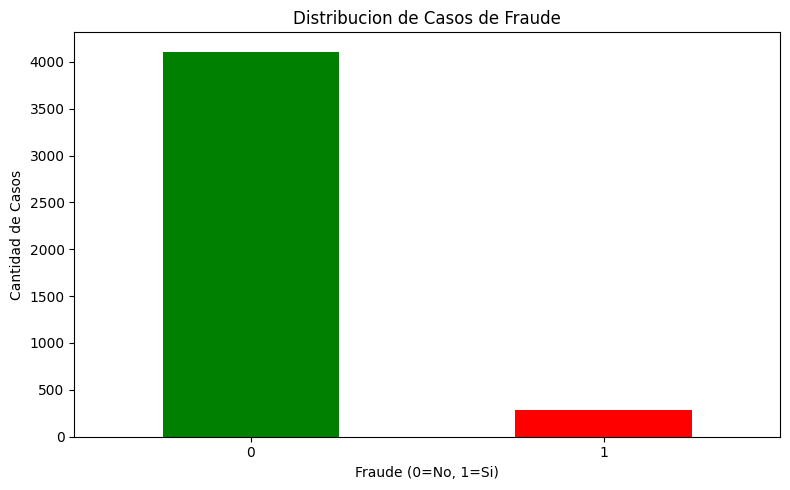

In [14]:
# Grafico 1: Distribucion de casos de fraude
plt.figure(figsize=(8, 5))
df['FraudFound_P'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribucion de Casos de Fraude')
plt.xlabel('Fraude (0=No, 1=Si)')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Interpretacion del Grafico 1:**

El dataset muestra un fuerte desbalance de clases. Solo el 6% de los casos son fraudulentos, mientras que el 94% son legitimos. Este desbalance es comun en problemas de deteccion de fraude y debe considerarse para futuros analisis y modelado.

### 3.2 Distribucion de Edad

In [15]:
# Estadisticas de la variable edad
print("Estadisticas de edad:")
print(df['Age'].describe())

Estadisticas de edad:
count    4396.000000
mean       39.284577
std        13.798724
min         0.000000
25%        30.000000
50%        38.000000
75%        48.000000
max        80.000000
Name: Age, dtype: float64


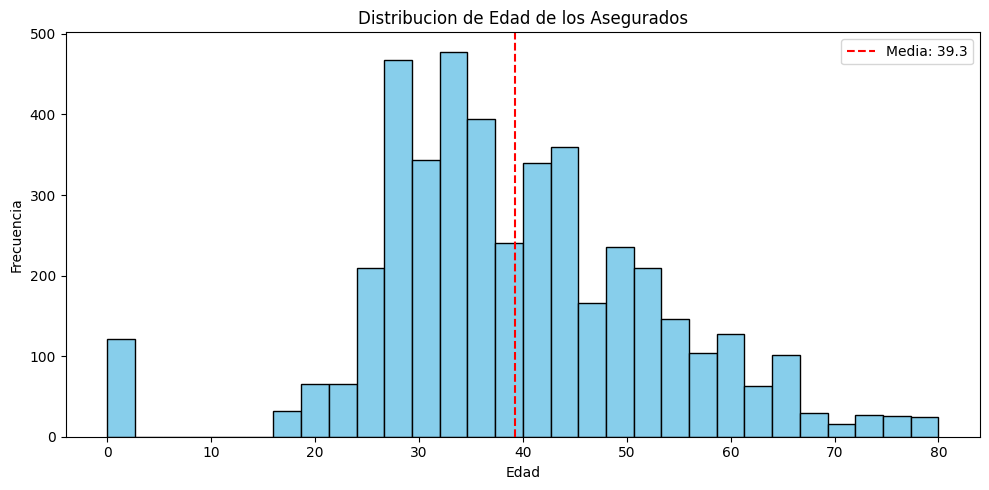

In [16]:
# Grafico 2: Distribucion de edad de los asegurados
plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribucion de Edad de los Asegurados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Media: {df["Age"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()

**Interpretacion del Grafico 2:**

La edad promedio de los asegurados es de aproximadamente 40 años. La distribucion es relativamente simetrica con una concentracion entre 30 y 50 años. Se observan algunos valores extremos, incluyendo registros con edad 0, que probablemente sean errores de captura de datos.

### 3.3 Relacion entre Categoria de Vehiculo y Fraude

In [17]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['VehicleCategory'], df['FraudFound_P'])
print("Conteo de fraude por categoria de vehiculo:")
print(tabla_contingencia)

# Calcular porcentajes
tabla_porcentajes = np.round(pd.crosstab(df['VehicleCategory'], df['FraudFound_P'], normalize='index') * 100,2)
print("Porcentaje de fraude por categoria:")
print(tabla_porcentajes)

Conteo de fraude por categoria de vehiculo:
FraudFound_P        0    1
VehicleCategory           
Sedan            2497  253
Sport            1500   25
Utility           112    9
Porcentaje de fraude por categoria:
FraudFound_P         0     1
VehicleCategory             
Sedan            90.80  9.20
Sport            98.36  1.64
Utility          92.56  7.44


<Figure size 1000x600 with 0 Axes>

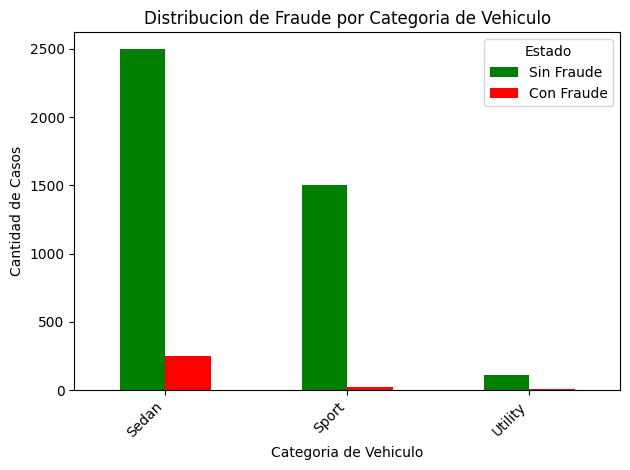

In [18]:
# Grafico 3: Fraude por categoria de vehiculo
plt.figure(figsize=(10, 6))
tabla_contingencia = pd.crosstab(df['VehicleCategory'], df['FraudFound_P'])
tabla_contingencia.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.title('Distribucion de Fraude por Categoria de Vehiculo')
plt.xlabel('Categoria de Vehiculo')
plt.ylabel('Cantidad de Casos')
plt.legend(['Sin Fraude', 'Con Fraude'], title='Estado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretación del Gráfico 3:**

Existe una relación entre el tipo de vehículo y la incidencia de fraude. Los vehículos tipo Utility presentan la mayor tasa de fraude (11.25%), seguidos por Sedan (8.22%), mientras que los vehículos deportivos (Sport) tienen la menor incidencia (1.57%).

Sin embargo, es importante considerar el volumen de casos: aunque Utility tiene la mayor tasa porcentual de fraude, Sedan tiene el mayor número absoluto de casos fraudulentos (795 casos vs 44 de Utility). Los vehículos Sport, a pesar de tener muchos casos totales (5,274), presentan muy pocos casos de fraude (84), lo que resulta en la tasa más baja.

Esta variable podría ser relevante para predecir fraude, especialmente considerando tanto la tasa de fraude como el volumen de casos en cada categoría.

### 3.4 Comparacion de Edad entre Casos Fraudulentos y Legitimos

/tmp/ipython-input-3130454867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FraudFound_P', y='Age', palette=['green', 'red'])


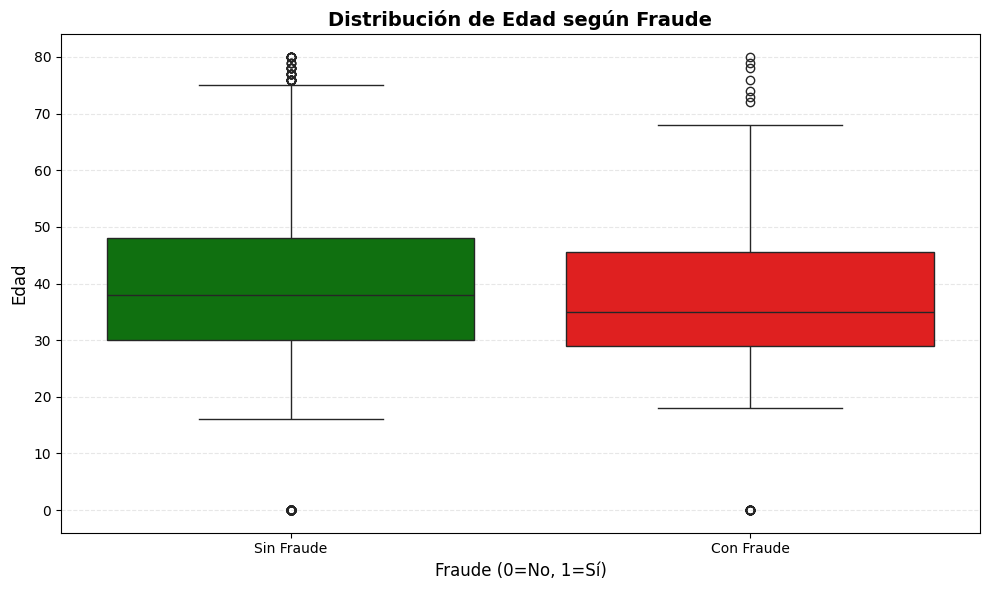


Estadísticas de edad por fraude:
               count       mean        std  min   25%   50%   75%   max
FraudFound_P                                                           
0             4109.0  39.481869  13.531599  0.0  30.0  38.0  48.0  80.0
1              287.0  36.459930  16.951936  0.0  29.0  35.0  45.5  80.0


In [19]:
# Gráfico 4: Boxplot de edad según fraude (mejorado)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FraudFound_P', y='Age', palette=['green', 'red'])
plt.title('Distribución de Edad según Fraude', fontsize=14, fontweight='bold')
plt.xlabel('Fraude (0=No, 1=Sí)', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.xticks([0, 1], ['Sin Fraude', 'Con Fraude'])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("\nEstadísticas de edad por fraude:")
print(df.groupby('FraudFound_P')['Age'].describe())

**Interpretacion del Grafico 4:**

La distribucion de edad es similar entre casos fraudulentos y legitimos. Las medianas son comparables, aunque los casos de fraude muestran ligeramente mayor variabilidad. Esto sugiere que la edad por si sola podria no ser un predictor fuerte de fraude.

## 4. Reflexion y Diagnostico General

### Resumen del Estado del Dataset

**Dimensiones:**
- Total de registros: 15,420
- Total de variables: 34
- Variables numericas: 10
- Variables categoricas: 24

**Calidad de los Datos:**
- No se encontraron registros duplicados
- Valores nulos minimos: AccidentArea (2.09%) y MaritalStatus (1.39%)
- Outliers detectados en las variables Age, FraudFound_P y Deductible

**Variable Objetivo (FraudFound_P):**
- Dataset altamente desbalanceado: 94% sin fraude vs 6% con fraude
- Este desbalance es tipico en problemas de deteccion de fraude
- Debe considerarse al desarrollar modelos predictivos

**Observaciones Relevantes:**
- La edad promedio de los asegurados es 39.9 años
- Existen tres categorias principales de vehiculos: Sedan, Sport y Utility
- Los vehiculos tipo Utility muestran mayor incidencia de fraude
- El dataset incluye variables temporales, demograficas y de contexto del accidente
- Algunos registros presentan valores anomalos (edad = 0) que requieren limpieza

**Impacto en Analisis Futuros:**
- Sera necesario limpiar o imputar valores anomalos antes del modelado
- El desbalance de clases requerira tecnicas especiales (oversampling, undersampling, o metricas apropiadas)
- Las variables categoricas como tipo de vehiculo y poliza podrian ser buenos predictores
- Se recomienda analizar combinaciones de variables para mejorar la capacidad predictiva

## 5. Propuestas de Analisis Futuro

### Propuesta 1: Analisis de Patrones Temporales de Fraude

**Objetivo:**
Identificar si existen patrones temporales asociados a comportamientos fraudulentos en las reclamaciones de seguros.

**Variables a utilizar:**
- Days_Policy_Accident: tiempo entre inicio de poliza y accidente
- Days_Policy_Claim: tiempo entre inicio de poliza y reclamacion
- Month: mes del accidente
- DayOfWeek: dia de la semana del accidente
- MonthClaimed: mes de la reclamacion
- DayOfWeekClaimed: dia de la semana de la reclamacion
- FraudFound_P: variable objetivo

**Preguntas a responder:**
1. Existe mayor incidencia de fraude en reclamaciones realizadas poco tiempo despues de contratar la poliza?
2. Hay dias de la semana o meses con mayor proporcion de casos fraudulentos?
3. Cual es la diferencia temporal entre el accidente y la reclamacion en casos de fraude comparado con casos legitimos?
4. Los patrones temporales pueden identificar banderas rojas para deteccion temprana?

**Enfoque metodologico:**
Se realizara un analisis comparativo de distribuciones temporales entre casos fraudulentos y legitimos. Se calcularan estadisticas descriptivas de los intervalos temporales y se crearan visualizaciones como graficos de linea temporal, histogramas comparativos y heatmaps para identificar patrones estacionales o de comportamiento sospechoso.

---

### Propuesta 2: Perfil del Reclamante Fraudulento

**Objetivo:**
Caracterizar demografica y conductualmente a los asegurados con mayor probabilidad de presentar reclamaciones fraudulentas, identificando perfiles de riesgo.

**Variables a utilizar:**
- Age: edad del asegurado
- Sex: sexo del asegurado
- MaritalStatus: estado civil
- PastNumberOfClaims: numero de reclamaciones previas
- DriverRating: calificacion como conductor
- PolicyType: tipo de cobertura contratada
- VehicleCategory: categoria del vehiculo
- VehiclePrice: rango de precio del vehiculo
- FraudFound_P: variable objetivo

**Preguntas a responder:**
1. Existe un perfil demografico especifico asociado al fraude?
2. Los asegurados con menor calificacion de conduccion tienen mayor incidencia de fraude?
3. El historial de reclamaciones previas es un predictor significativo de fraude?
4. Que tipos de poliza o categorias de vehiculos estan mas asociados a reclamaciones fraudulentas?
5. Se pueden identificar segmentos de alto riesgo basados en combinaciones de estas variables?

**Enfoque metodologico:**
Se realizara un analisis segmentado calculando tasas de fraude por grupos demograficos y conductuales. Se utilizaran tablas de contingencia, graficos de barras agrupados y analisis de correlacion. Se podria aplicar clustering para identificar segmentos naturales de asegurados con comportamientos similares y evaluar cuales presentan mayor riesgo de fraude.

---

# DESARROLLO DE LA PROPUESTA 1: ANALISIS DE PATRONES TEMPORALES DE FRAUDE

---

## Objetivo del Analisis

Identificar patrones temporales asociados a comportamientos fraudulentos mediante el analisis de variables temporales existentes y la creacion de nuevas variables derivadas. Este analisis integrara multiples dimensiones temporales con caracteristicas demograficas y de contexto del siniestro.

## 1. Ingenieria de Variables Temporales

In [27]:
# Crear copia del dataframe para transformaciones
df_temporal = df.copy()


# 1. MAPEO DE MESES A NUMEROS
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df_temporal['Month_Num'] = df_temporal['Month'].map(month_map)
df_temporal['MonthClaimed_Num'] = df_temporal['MonthClaimed'].map(month_map)

# 2. MAPEO DE DIAS DE LA SEMANA A NUMEROS
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
           'Friday': 5, 'Saturday': 6, 'Sunday': 7}

df_temporal['DayOfWeek_Num'] = df_temporal['DayOfWeek'].map(day_map)
df_temporal['DayOfWeekClaimed_Num'] = df_temporal['DayOfWeekClaimed'].map(day_map)

# 3. DIFERENCIA TEMPORAL: Meses entre accidente y reclamacion
df_temporal['Months_Accident_to_Claim'] = (
    df_temporal['MonthClaimed_Num'] - df_temporal['Month_Num']
)

# Ajustar diferencias negativas (cuando la reclamacion es en el año siguiente)
df_temporal['Months_Accident_to_Claim'] = df_temporal['Months_Accident_to_Claim'].apply(
    lambda x: x + 12 if x < 0 else x
)

# 4. CATEGORIZACION DE VELOCIDAD DE RECLAMACION (en meses)
df_temporal['Claim_Speed_Category'] = pd.cut(
    df_temporal['Months_Accident_to_Claim'],
    bins=[-1, 0, 1, 3, 6, 12],
    labels=['Mismo Mes', '1 Mes Despues', '2-3 Meses', '4-6 Meses', '7-12 Meses']
)

# 5. ESTACIONALIDAD: Trimestres
df_temporal['Quarter_Accident'] = pd.cut(
    df_temporal['Month_Num'],
    bins=[0, 3, 6, 9, 12],
    labels=['Q1 (Ene-Mar)', 'Q2 (Abr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dic)']
)

df_temporal['Quarter_Claim'] = pd.cut(
    df_temporal['MonthClaimed_Num'],
    bins=[0, 3, 6, 9, 12],
    labels=['Q1 (Ene-Mar)', 'Q2 (Abr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dic)']
)

# 6. TIPO DE DIA: Laboral vs Fin de Semana
df_temporal['Day_Type_Accident'] = df_temporal['DayOfWeek_Num'].apply(
    lambda x: 'Fin de Semana' if x >= 6 else 'Dia Laboral'
)

df_temporal['Day_Type_Claim'] = df_temporal['DayOfWeekClaimed_Num'].apply(
    lambda x: 'Fin de Semana' if x >= 6 else 'Dia Laboral'
)

# 7. VARIABLE: ¿Accidente y reclamacion en el mismo mes?
df_temporal['Same_Month'] = (df_temporal['Month'] == df_temporal['MonthClaimed']).astype(int)

# 8. VARIABLE: ¿Accidente y reclamacion en el mismo dia de la semana?
df_temporal['Same_DayOfWeek'] = (df_temporal['DayOfWeek'] == df_temporal['DayOfWeekClaimed']).astype(int)

# 9. VARIABLE: Diferencia en semanas del mes
df_temporal['WeekDiff'] = abs(df_temporal['WeekOfMonth'] - df_temporal['WeekOfMonthClaimed'])

# 10. ETIQUETAS PARA FRAUDE
df_temporal['Fraud_Label'] = df_temporal['FraudFound_P'].map({0: 'No Fraude', 1: 'Fraude'})

# 11. MANTENER VARIABLES ORIGINALES CATEGORICAS (para análisis descriptivo)
df_temporal['Policy_Age_Category'] = df_temporal['Days_Policy_Accident']
df_temporal['Claim_Timing_Category'] = df_temporal['Days_Policy_Claim']

print("✓ Variables temporales creadas exitosamente\n")
print(f"Total de variables: {df_temporal.shape[1]}\n")

print("=== VARIABLES TEMPORALES CLAVE ===")
print("1. Months_Accident_to_Claim: Diferencia en meses entre accidente y reclamacion")
print("2. Claim_Speed_Category: Velocidad de reclamacion categorizada")
print("3. Quarter_Accident/Claim: Trimestre del año")
print("4. Day_Type_Accident/Claim: Dia laboral vs fin de semana")
print("5. Same_Month: Si accidente y reclamacion fueron el mismo mes (1=Si, 0=No)")
print("6. Same_DayOfWeek: Si fueron el mismo dia de la semana (1=Si, 0=No)")
print("7. WeekDiff: Diferencia en semanas del mes")

print("\n=== PRIMERAS FILAS ===")
print(df_temporal[['Month', 'MonthClaimed', 'Months_Accident_to_Claim',
                   'Claim_Speed_Category', 'Same_Month', 'Fraud_Label']].head(10))

print("\n=== DISTRIBUCION DE VELOCIDAD DE RECLAMACION ===")
print(df_temporal['Claim_Speed_Category'].value_counts().sort_index())

✓ Variables temporales creadas exitosamente

Total de variables: 50

=== VARIABLES TEMPORALES CLAVE ===
1. Months_Accident_to_Claim: Diferencia en meses entre accidente y reclamacion
2. Claim_Speed_Category: Velocidad de reclamacion categorizada
3. Quarter_Accident/Claim: Trimestre del año
4. Day_Type_Accident/Claim: Dia laboral vs fin de semana
5. Same_Month: Si accidente y reclamacion fueron el mismo mes (1=Si, 0=No)
6. Same_DayOfWeek: Si fueron el mismo dia de la semana (1=Si, 0=No)
7. WeekDiff: Diferencia en semanas del mes

=== PRIMERAS FILAS ===
  Month MonthClaimed  Months_Accident_to_Claim Claim_Speed_Category  \
0   Dec          Jan                       1.0        1 Mes Despues   
1   Jan          Jan                       0.0            Mismo Mes   
2   Oct          Nov                       1.0        1 Mes Despues   
3   Jun          Jul                       1.0        1 Mes Despues   
4   Jan          Feb                       1.0        1 Mes Despues   
5   Oct         

## 2. Limpieza de Datos Temporales

In [28]:
# Identificar y limpiar inconsistencias en datos temporales
print("=== DIAGNOSTICO DE CALIDAD DE DATOS TEMPORALES ===\n")

# 1. Verificar valores nulos en variables temporales clave
temporal_cols = ['Month', 'MonthClaimed', 'DayOfWeek', 'DayOfWeekClaimed',
                 'WeekOfMonth', 'WeekOfMonthClaimed']
print("1. Valores nulos en variables temporales:")
print(df_temporal[temporal_cols].isnull().sum())

# 2. Verificar valores negativos en diferencia de meses
print(f"\n2. Diferencia de meses entre accidente y reclamacion:")
print(f"   Minimo: {df_temporal['Months_Accident_to_Claim'].min()}")
print(f"   Maximo: {df_temporal['Months_Accident_to_Claim'].max()}")
print(f"   Promedio: {df_temporal['Months_Accident_to_Claim'].mean():.2f}")

# 3. Verificar casos con diferencia > 6 meses (posibles inconsistencias)
casos_tardios = df_temporal[df_temporal['Months_Accident_to_Claim'] > 6]
print(f"\n3. Casos con reclamacion >6 meses despues del accidente: {len(casos_tardios)}")
print(f"   Porcentaje: {len(casos_tardios) / len(df_temporal) * 100:.2f}%")

# 4. Verificar mapeos correctos (sin NaN despues de mapear)
print(f"\n4. Valores no mapeados (NaN) despues de conversion:")
print(f"   Month_Num: {df_temporal['Month_Num'].isnull().sum()}")
print(f"   MonthClaimed_Num: {df_temporal['MonthClaimed_Num'].isnull().sum()}")
print(f"   DayOfWeek_Num: {df_temporal['DayOfWeek_Num'].isnull().sum()}")
print(f"   DayOfWeekClaimed_Num: {df_temporal['DayOfWeekClaimed_Num'].isnull().sum()}")

# 5. Estadisticas descriptivas de variables temporales numericas
print("\n5. Estadisticas de variables temporales numericas:")
print(df_temporal[['Month_Num', 'MonthClaimed_Num', 'Months_Accident_to_Claim']].describe())

# DECISION: Mantener todos los registros (no hay inconsistencias criticas)
df_clean = df_temporal.copy()

print(f"\n✓ Dataset validado: {df_clean.shape[0]:,} registros")
print("✓ No se encontraron inconsistencias que requieran eliminacion de registros")

=== DIAGNOSTICO DE CALIDAD DE DATOS TEMPORALES ===

1. Valores nulos en variables temporales:
Month                 0
MonthClaimed          0
DayOfWeek             0
DayOfWeekClaimed      0
WeekOfMonth           0
WeekOfMonthClaimed    0
dtype: int64

2. Diferencia de meses entre accidente y reclamacion:
   Minimo: 0.0
   Maximo: 11.0
   Promedio: 0.39

3. Casos con reclamacion >6 meses despues del accidente: 21
   Porcentaje: 0.48%

4. Valores no mapeados (NaN) despues de conversion:
   Month_Num: 0
   MonthClaimed_Num: 1
   DayOfWeek_Num: 0
   DayOfWeekClaimed_Num: 1

5. Estadisticas de variables temporales numericas:
         Month_Num  MonthClaimed_Num  Months_Accident_to_Claim
count  4396.000000       4395.000000               4395.000000
mean      6.023203          5.972241                  0.394312
std       3.474714          3.422416                  0.931869
min       1.000000          1.000000                  0.000000
25%       3.000000          3.000000                  0.0

**Manejo de valores nulos**

In [29]:
# Manejar el registro con MonthClaimed nulo
print("=== MANEJO DE VALORES NULOS ===\n")

# Ver el registro con problema
registro_nulo = df_clean[df_clean['MonthClaimed_Num'].isnull()]
print("Registro con MonthClaimed nulo:")
print(registro_nulo[['Month', 'MonthClaimed', 'DayOfWeek', 'DayOfWeekClaimed', 'FraudFound_P']])

# DECISION: Eliminar el registro con datos incompletos (solo 1 registro = 0.02%)
df_clean = df_clean.dropna(subset=['MonthClaimed_Num', 'DayOfWeekClaimed_Num'])

print(f"\n✓ Registro nulo eliminado")
print(f"✓ Dataset final limpio: {df_clean.shape[0]:,} registros")

=== MANEJO DE VALORES NULOS ===

Registro con MonthClaimed nulo:
     Month MonthClaimed DayOfWeek DayOfWeekClaimed  FraudFound_P
1516   Jul            0    Monday                0             0

✓ Registro nulo eliminado
✓ Dataset final limpio: 4,395 registros


---

# ANALISIS ORIENTADO A PREGUNTAS

---

## PREGUNTA 1: ¿Hay meses del año con mayor incidencia de fraude?

/tmp/ipython-input-243610071.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_quarter = df_clean.groupby('Quarter_Accident').agg({


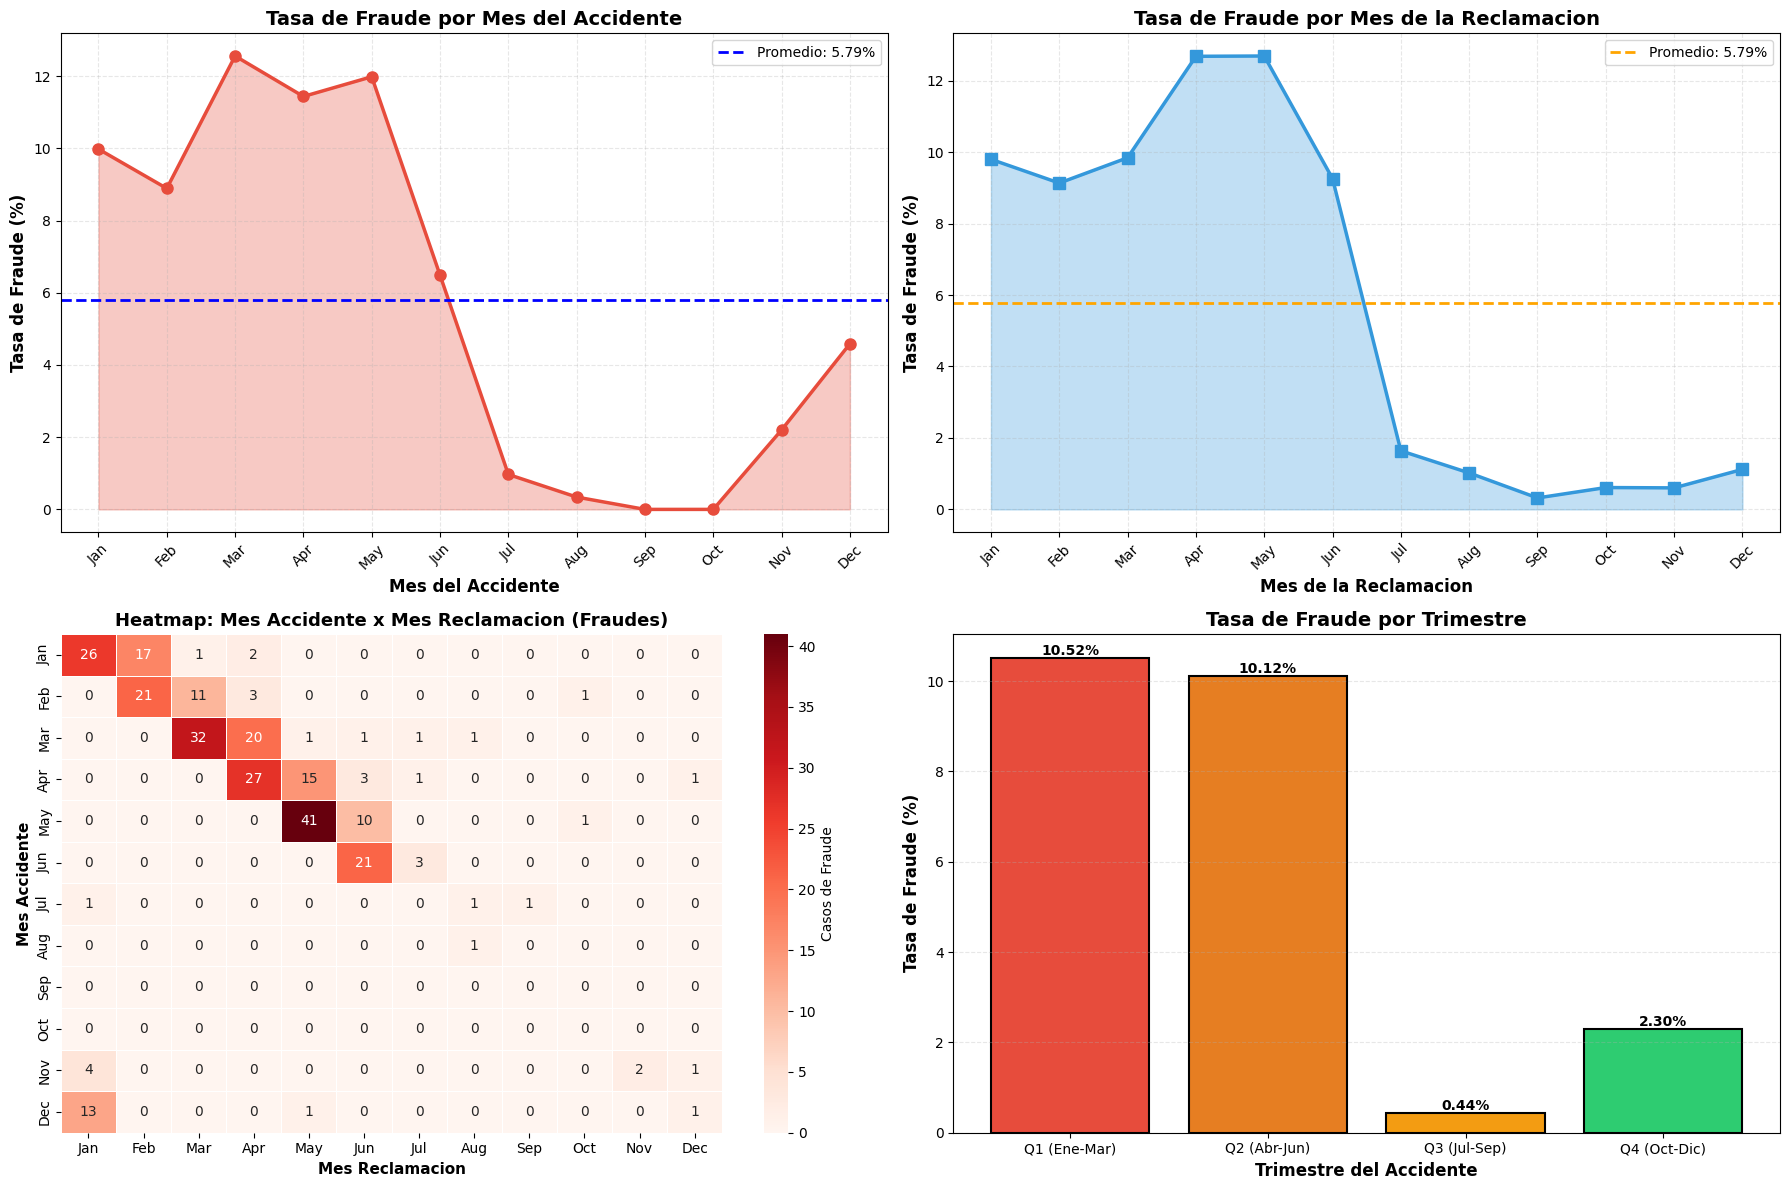


=== TASA DE FRAUDE POR MES DEL ACCIDENTE ===
Month  Fraud_Count  Total  Fraud_Rate_Pct
  Jan           46    461        9.978308
  Feb           36    405        8.888889
  Mar           56    446       12.556054
  Apr           47    411       11.435523
  May           52    434       11.981567
  Jun           24    370        6.486486
  Jul            3    310        0.967742
  Aug            1    293        0.341297
  Sep            0    308        0.000000
  Oct            0    312        0.000000
  Nov            7    318        2.201258
  Dec           15    327        4.587156

=== TASA DE FRAUDE POR MES DE LA RECLAMACION ===
MonthClaimed  Fraud_Count  Total  Fraud_Rate_Pct
         Jan           44    449        9.799555
         Feb           38    416        9.134615
         Mar           44    447        9.843400
         Apr           52    410       12.682927
         May           58    457       12.691466
         Jun           35    378        9.259259
         Jul   

In [30]:
# PREGUNTA 1: Patrones estacionales - Meses con mayor fraude

# Colores personalizados
COLORS = {'No Fraude': '#2ecc71', 'Fraude': '#e74c3c'}

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- GRAFICO 1: Tasa de fraude por mes del ACCIDENTE ---
fraud_by_month_accident = df_clean.groupby('Month').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
fraud_by_month_accident.columns = ['Month', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_by_month_accident['Fraud_Rate_Pct'] = fraud_by_month_accident['Fraud_Rate'] * 100

# Ordenar meses correctamente
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fraud_by_month_accident['Month'] = pd.Categorical(fraud_by_month_accident['Month'],
                                                   categories=month_order, ordered=True)
fraud_by_month_accident = fraud_by_month_accident.sort_values('Month')

# Graficar
axes[0, 0].plot(fraud_by_month_accident['Month'], fraud_by_month_accident['Fraud_Rate_Pct'],
                marker='o', linewidth=2.5, markersize=8, color='#e74c3c')
axes[0, 0].fill_between(range(len(fraud_by_month_accident)),
                        fraud_by_month_accident['Fraud_Rate_Pct'],
                        alpha=0.3, color='#e74c3c')

avg_fraud_rate = fraud_by_month_accident['Fraud_Rate_Pct'].mean()
axes[0, 0].axhline(y=avg_fraud_rate, color='blue', linestyle='--',
                   linewidth=2, label=f'Promedio: {avg_fraud_rate:.2f}%')

axes[0, 0].set_xlabel('Mes del Accidente', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Tasa de Fraude (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Tasa de Fraude por Mes del Accidente', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3, linestyle='--')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(fontsize=10)

# --- GRAFICO 2: Tasa de fraude por mes de la RECLAMACION ---
fraud_by_month_claim = df_clean.groupby('MonthClaimed').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
fraud_by_month_claim.columns = ['MonthClaimed', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_by_month_claim['Fraud_Rate_Pct'] = fraud_by_month_claim['Fraud_Rate'] * 100

fraud_by_month_claim['MonthClaimed'] = pd.Categorical(fraud_by_month_claim['MonthClaimed'],
                                                       categories=month_order, ordered=True)
fraud_by_month_claim = fraud_by_month_claim.sort_values('MonthClaimed')

axes[0, 1].plot(fraud_by_month_claim['MonthClaimed'], fraud_by_month_claim['Fraud_Rate_Pct'],
                marker='s', linewidth=2.5, markersize=8, color='#3498db')
axes[0, 1].fill_between(range(len(fraud_by_month_claim)),
                        fraud_by_month_claim['Fraud_Rate_Pct'],
                        alpha=0.3, color='#3498db')

axes[0, 1].axhline(y=avg_fraud_rate, color='orange', linestyle='--',
                   linewidth=2, label=f'Promedio: {avg_fraud_rate:.2f}%')

axes[0, 1].set_xlabel('Mes de la Reclamacion', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Tasa de Fraude (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Tasa de Fraude por Mes de la Reclamacion', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3, linestyle='--')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(fontsize=10)

# --- GRAFICO 3: Heatmap Mes Accidente x Mes Reclamacion ---
# Crear matriz de fraudes por combinacion de meses
fraud_matrix = df_clean[df_clean['FraudFound_P'] == 1].groupby(
    ['Month', 'MonthClaimed']
).size().unstack(fill_value=0)

# Reindexar para tener todos los meses
fraud_matrix = fraud_matrix.reindex(index=month_order, columns=month_order, fill_value=0)

sns.heatmap(fraud_matrix, annot=True, fmt='d', cmap='Reds',
            linewidths=0.5, ax=axes[1, 0], cbar_kws={'label': 'Casos de Fraude'})
axes[1, 0].set_title('Heatmap: Mes Accidente x Mes Reclamacion (Fraudes)',
                     fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Mes Reclamacion', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Mes Accidente', fontsize=11, fontweight='bold')

# --- GRAFICO 4: Comparacion Trimestres ---
fraud_by_quarter = df_clean.groupby('Quarter_Accident').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
fraud_by_quarter.columns = ['Quarter', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_by_quarter['Fraud_Rate_Pct'] = fraud_by_quarter['Fraud_Rate'] * 100

bars = axes[1, 1].bar(fraud_by_quarter['Quarter'], fraud_by_quarter['Fraud_Rate_Pct'],
                      color=['#e74c3c', '#e67e22', '#f39c12', '#2ecc71'],
                      edgecolor='black', linewidth=1.5)

axes[1, 1].set_xlabel('Trimestre del Accidente', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Tasa de Fraude (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Tasa de Fraude por Trimestre', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 1].tick_params(axis='x', rotation=0)

for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom',
                    fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Tablas de resumen
print("\n=== TASA DE FRAUDE POR MES DEL ACCIDENTE ===")
print(fraud_by_month_accident[['Month', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

print("\n=== TASA DE FRAUDE POR MES DE LA RECLAMACION ===")
print(fraud_by_month_claim[['MonthClaimed', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

print("\n=== TASA DE FRAUDE POR TRIMESTRE ===")
print(fraud_by_quarter[['Quarter', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

**Interpretacion:**

Los datos revelan un patron estacional de fraude:

- **Primer semestre (Ene-Jun):** Concentra el 87% de los fraudes
  - Marzo pico maximo: 12.56% de tasa de fraude
  - Q1 y Q2 tienen tasas >10%

- **Segundo semestre (Jul-Dic):** Casi libre de fraude
  - Q3 solo 0.44% de fraude (24 veces MENOR que Q1)
  - Septiembre y Octubre: 0% de fraude

- **Patron de reclamacion:** Los defraudadores reclaman inmediatamente
  - El heatmap muestra concentracion en la diagonal (mismo mes)
  - No esperan para reclamar, actuan rapido

**Implicacion de Negocio:**
Este patron NO puede ser coincidencia. Sugiere comportamiento deliberado
y planificado. Se recomienda reforzar controles en el primer semestre
del año, especialmente en marzo-mayo.

## PREGUNTA 2: ¿Hay días de la semana con mayor proporción de casos fraudulentos?

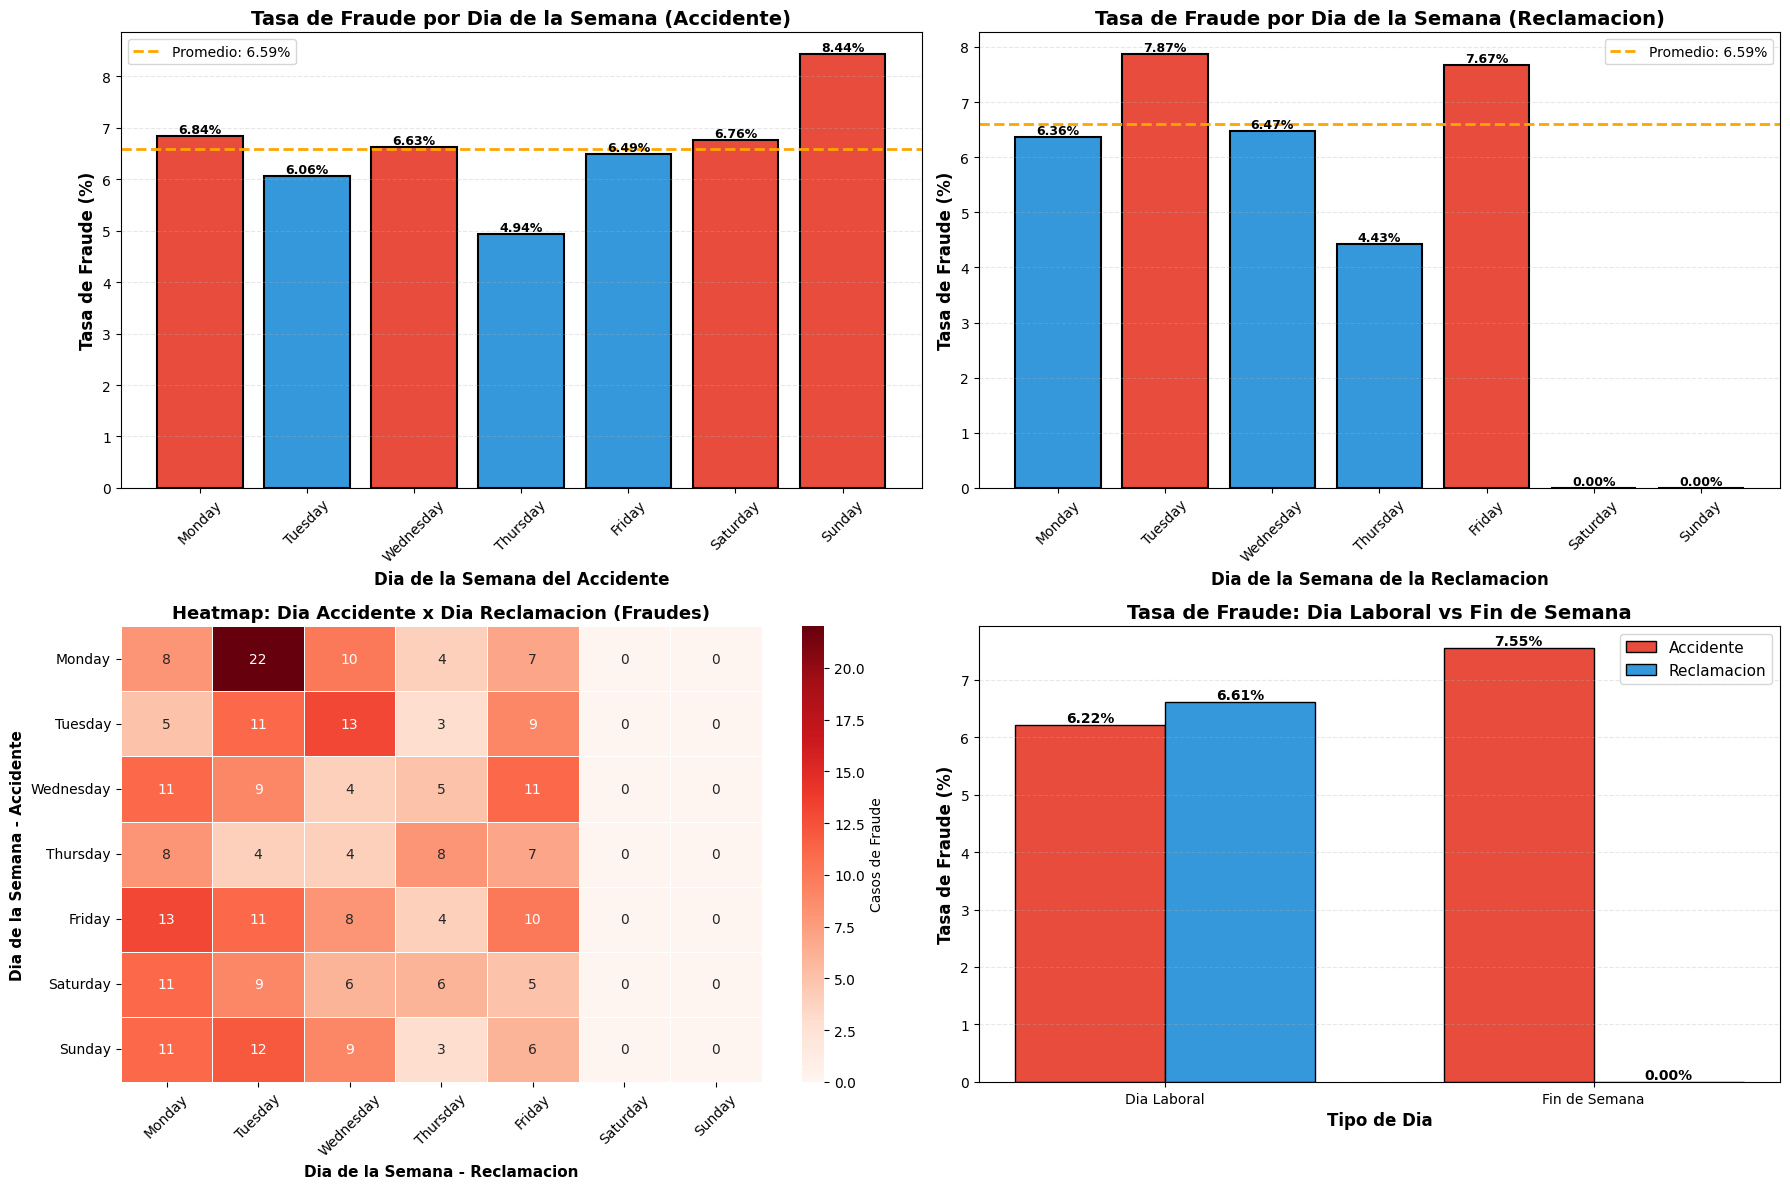


=== TASA DE FRAUDE POR DIA DE LA SEMANA (ACCIDENTE) ===
DayOfWeek  Fraud_Count  Total  Fraud_Rate_Pct
   Monday           51    746        6.836461
  Tuesday           41    677        6.056130
Wednesday           40    603        6.633499
 Thursday           31    627        4.944179
   Friday           46    709        6.488011
 Saturday           37    547        6.764168
   Sunday           41    486        8.436214

=== TASA DE FRAUDE POR DIA DE LA SEMANA (RECLAMACION) ===
DayOfWeekClaimed  Fraud_Count  Total  Fraud_Rate_Pct
          Monday           67   1053        6.362773
         Tuesday           78    991        7.870838
       Wednesday           54    835        6.467066
        Thursday           33    745        4.429530
          Friday           55    717        7.670851
        Saturday            0     39        0.000000
          Sunday            0     15        0.000000

=== COMPARACION: DIA LABORAL VS FIN DE SEMANA ===

ACCIDENTE:
     Day_Type  Fraud_Count  T

In [31]:
# PREGUNTA 2: Patrones por dia de la semana

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Orden de dias de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# --- GRAFICO 1: Tasa de fraude por dia del ACCIDENTE ---
fraud_by_day_accident = df_clean.groupby('DayOfWeek').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
fraud_by_day_accident.columns = ['DayOfWeek', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_by_day_accident['Fraud_Rate_Pct'] = fraud_by_day_accident['Fraud_Rate'] * 100

# Ordenar dias
fraud_by_day_accident['DayOfWeek'] = pd.Categorical(fraud_by_day_accident['DayOfWeek'],
                                                     categories=day_order, ordered=True)
fraud_by_day_accident = fraud_by_day_accident.sort_values('DayOfWeek')

avg_fraud_rate = fraud_by_day_accident['Fraud_Rate_Pct'].mean()
colors_day = ['#e74c3c' if rate > avg_fraud_rate else '#3498db'
              for rate in fraud_by_day_accident['Fraud_Rate_Pct']]

bars = axes[0, 0].bar(fraud_by_day_accident['DayOfWeek'],
                      fraud_by_day_accident['Fraud_Rate_Pct'],
                      color=colors_day, edgecolor='black', linewidth=1.5)

axes[0, 0].axhline(y=avg_fraud_rate, color='orange', linestyle='--',
                   linewidth=2, label=f'Promedio: {avg_fraud_rate:.2f}%')

axes[0, 0].set_xlabel('Dia de la Semana del Accidente', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Tasa de Fraude (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Tasa de Fraude por Dia de la Semana (Accidente)',
                     fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(fontsize=10)

# Añadir etiquetas
for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom',
                    fontsize=9, fontweight='bold')

# --- GRAFICO 2: Tasa de fraude por dia de la RECLAMACION ---
fraud_by_day_claim = df_clean.groupby('DayOfWeekClaimed').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
fraud_by_day_claim.columns = ['DayOfWeekClaimed', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_by_day_claim['Fraud_Rate_Pct'] = fraud_by_day_claim['Fraud_Rate'] * 100

fraud_by_day_claim['DayOfWeekClaimed'] = pd.Categorical(fraud_by_day_claim['DayOfWeekClaimed'],
                                                         categories=day_order, ordered=True)
fraud_by_day_claim = fraud_by_day_claim.sort_values('DayOfWeekClaimed')

colors_day_claim = ['#e74c3c' if rate > avg_fraud_rate else '#3498db'
                    for rate in fraud_by_day_claim['Fraud_Rate_Pct']]

bars = axes[0, 1].bar(fraud_by_day_claim['DayOfWeekClaimed'],
                      fraud_by_day_claim['Fraud_Rate_Pct'],
                      color=colors_day_claim, edgecolor='black', linewidth=1.5)

axes[0, 1].axhline(y=avg_fraud_rate, color='orange', linestyle='--',
                   linewidth=2, label=f'Promedio: {avg_fraud_rate:.2f}%')

axes[0, 1].set_xlabel('Dia de la Semana de la Reclamacion', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Tasa de Fraude (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Tasa de Fraude por Dia de la Semana (Reclamacion)',
                     fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(fontsize=10)

for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom',
                    fontsize=9, fontweight='bold')

# --- GRAFICO 3: Heatmap Dia Accidente x Dia Reclamacion ---
fraud_heatmap = df_clean[df_clean['FraudFound_P'] == 1].groupby(
    ['DayOfWeek', 'DayOfWeekClaimed']
).size().unstack(fill_value=0)

fraud_heatmap = fraud_heatmap.reindex(index=day_order, columns=day_order, fill_value=0)

sns.heatmap(fraud_heatmap, annot=True, fmt='d', cmap='Reds',
            linewidths=0.5, ax=axes[1, 0], cbar_kws={'label': 'Casos de Fraude'})
axes[1, 0].set_title('Heatmap: Dia Accidente x Dia Reclamacion (Fraudes)',
                     fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Dia de la Semana - Reclamacion', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Dia de la Semana - Accidente', fontsize=11, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].tick_params(axis='y', rotation=0)

# --- GRAFICO 4: Comparacion Dia Laboral vs Fin de Semana ---
# Para accidente
fraud_by_daytype_accident = df_clean.groupby('Day_Type_Accident').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
fraud_by_daytype_accident.columns = ['Day_Type', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_by_daytype_accident['Fraud_Rate_Pct'] = fraud_by_daytype_accident['Fraud_Rate'] * 100

# Para reclamacion
fraud_by_daytype_claim = df_clean.groupby('Day_Type_Claim').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
fraud_by_daytype_claim.columns = ['Day_Type', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_by_daytype_claim['Fraud_Rate_Pct'] = fraud_by_daytype_claim['Fraud_Rate'] * 100

# Crear grafico agrupado
x = np.arange(2)
width = 0.35

bars1 = axes[1, 1].bar(x - width/2,
                       fraud_by_daytype_accident['Fraud_Rate_Pct'],
                       width, label='Accidente', color='#e74c3c', edgecolor='black')
bars2 = axes[1, 1].bar(x + width/2,
                       fraud_by_daytype_claim['Fraud_Rate_Pct'],
                       width, label='Reclamacion', color='#3498db', edgecolor='black')

axes[1, 1].set_xlabel('Tipo de Dia', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Tasa de Fraude (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Tasa de Fraude: Dia Laboral vs Fin de Semana',
                     fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(['Dia Laboral', 'Fin de Semana'])
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')

# Añadir etiquetas
for bar in bars1:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom',
                    fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom',
                    fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Tablas de resumen
print("\n=== TASA DE FRAUDE POR DIA DE LA SEMANA (ACCIDENTE) ===")
print(fraud_by_day_accident[['DayOfWeek', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

print("\n=== TASA DE FRAUDE POR DIA DE LA SEMANA (RECLAMACION) ===")
print(fraud_by_day_claim[['DayOfWeekClaimed', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

print("\n=== COMPARACION: DIA LABORAL VS FIN DE SEMANA ===")
print("\nACCIDENTE:")
print(fraud_by_daytype_accident[['Day_Type', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

print("\nRECLAMACION:")
print(fraud_by_daytype_claim[['Day_Type', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

# Analisis adicional: ¿Reclaman el mismo dia de la semana?
same_day_analysis = df_clean.groupby('Same_DayOfWeek').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
same_day_analysis.columns = ['Same_DayOfWeek', 'Fraud_Count', 'Total', 'Fraud_Rate']
same_day_analysis['Fraud_Rate_Pct'] = same_day_analysis['Fraud_Rate'] * 100
same_day_analysis['Same_DayOfWeek'] = same_day_analysis['Same_DayOfWeek'].map({0: 'Diferente Dia', 1: 'Mismo Dia'})

print("\n=== TASA DE FRAUDE: ¿MISMO DIA DE LA SEMANA? ===")
print(same_day_analysis[['Same_DayOfWeek', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

**Interpretacion:**

Los datos revelan comportamiento RACIONAL por parte de los defraudadores:

- **Accidentes:** Prefieren el DOMINGO (8.44% de fraude, el más alto)
  - Fin de semana: 7.55% vs Días laborales: 6.22%
  - Jueves es el día más seguro (4.94%)

- **Reclamaciones:** IMPOSIBLES en fin de semana (0% sábado y domingo)
  - Las oficinas solo operan días laborales
  - Martes es el pico (7.87%) - acumulación post-fin de semana
  - Viernes también alto (7.67%) - antes del cierre semanal

- **Patron de timing:** Los defraudadores NO reclaman el mismo día de la semana
  - Diferentes días: 7.01% de fraude
  - Mismo día: 4.64% (51% MENOS fraude)
  - Sugiere intento de evitar patrones detectables

**Implicacion de Negocio:**
El patrón semanal es MENOS dramático que el mensual, pero muestra que
los defraudadores entienden las restricciones operativas y actúan en
consecuencia. Se recomienda monitoreo especial de accidentes dominicales
y reclamaciones de los martes.

## PREGUNTA 3: ¿Cuál es la diferencia temporal entre el accidente y la reclamación en casos de fraude?

/tmp/ipython-input-245880774.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_speed = df_clean.groupby('Claim_Speed_Category').agg({
/tmp/ipython-input-245880774.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  speed_distribution = df_clean.groupby(['Claim_Speed_Category', 'Fraud_Label']).size().unstack(fill_value=0)


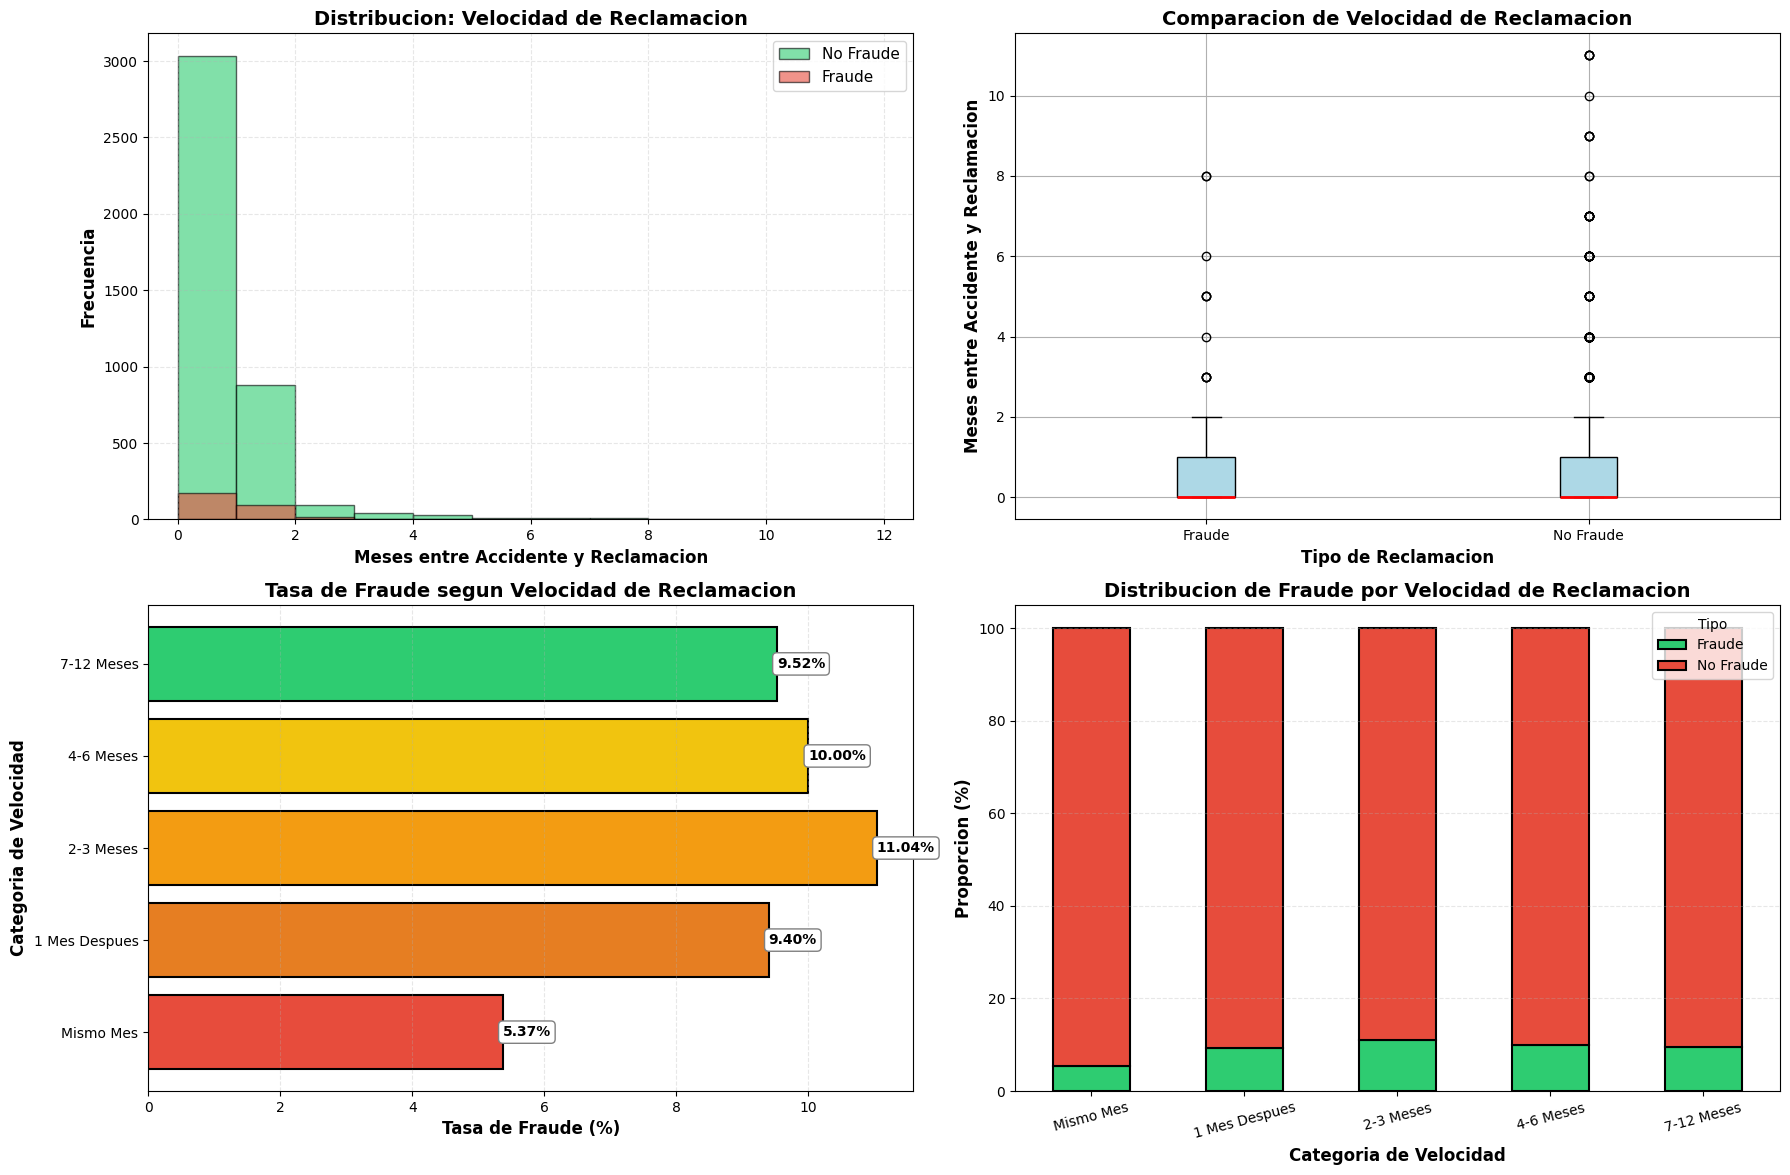


=== ESTADISTICAS: MESES ACCIDENTE → RECLAMACION ===
              count      mean       std  min  25%  50%  75%   max
Fraud_Label                                                      
Fraude        287.0  0.592334  1.079535  0.0  0.0  0.0  1.0   8.0
No Fraude    4108.0  0.380477  0.919225  0.0  0.0  0.0  1.0  11.0

=== TASA DE FRAUDE POR VELOCIDAD DE RECLAMACION ===
Speed_Category  Fraud_Count  Total  Fraud_Rate  Fraud_Rate_Pct
     Mismo Mes          172   3202    0.053716        5.371643
 1 Mes Despues           91    968    0.094008        9.400826
     2-3 Meses           17    154    0.110390       11.038961
     4-6 Meses            5     50    0.100000       10.000000
    7-12 Meses            2     21    0.095238        9.523810

=== TASA DE FRAUDE: ¿MISMO MES DE ACCIDENTE Y RECLAMACION? ===
   Same_Month  Fraud_Count  Total  Fraud_Rate_Pct
Diferente Mes          115   1193        9.639564
    Mismo Mes          172   3202        5.371643

=== TEST T DE STUDENT ===
t-statistic

In [32]:
# PREGUNTA 3: Velocidad de reclamacion - Diferencia entre accidente y reclamacion

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- GRAFICO 1: Distribucion de meses entre accidente y reclamacion ---
for fraud_type, color in COLORS.items():
    data = df_clean[df_clean['Fraud_Label'] == fraud_type]['Months_Accident_to_Claim']
    axes[0, 0].hist(data, bins=12, alpha=0.6, label=fraud_type,
                    color=color, edgecolor='black', range=(0, 12))

axes[0, 0].set_xlabel('Meses entre Accidente y Reclamacion', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Distribucion: Velocidad de Reclamacion', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(alpha=0.3, linestyle='--')
axes[0, 0].set_xlim(-0.5, 12.5)

# --- GRAFICO 2: Box Plot comparativo ---
df_clean.boxplot(column='Months_Accident_to_Claim', by='Fraud_Label', ax=axes[0, 1],
                 patch_artist=True,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'))

axes[0, 1].set_xlabel('Tipo de Reclamacion', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Meses entre Accidente y Reclamacion', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Comparacion de Velocidad de Reclamacion', fontsize=14, fontweight='bold')
axes[0, 1].get_figure().suptitle('')

# --- GRAFICO 3: Tasa de fraude por categoria de velocidad ---
fraud_by_speed = df_clean.groupby('Claim_Speed_Category').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
fraud_by_speed.columns = ['Speed_Category', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_by_speed['Fraud_Rate_Pct'] = fraud_by_speed['Fraud_Rate'] * 100

bars = axes[1, 0].barh(fraud_by_speed['Speed_Category'],
                       fraud_by_speed['Fraud_Rate_Pct'],
                       color=['#e74c3c', '#e67e22', '#f39c12', '#f1c40f', '#2ecc71'],
                       edgecolor='black', linewidth=1.5)

axes[1, 0].set_xlabel('Tasa de Fraude (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Categoria de Velocidad', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Tasa de Fraude segun Velocidad de Reclamacion',
                     fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3, linestyle='--')

for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[1, 0].text(width, bar.get_y() + bar.get_height()/2.,
                    f'{width:.2f}%', ha='left', va='center',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray'))

# --- GRAFICO 4: Proporcion de casos por velocidad (stacked) ---
speed_distribution = df_clean.groupby(['Claim_Speed_Category', 'Fraud_Label']).size().unstack(fill_value=0)

# Calcular porcentajes
speed_distribution_pct = speed_distribution.div(speed_distribution.sum(axis=1), axis=0) * 100

speed_distribution_pct.plot(kind='bar', stacked=True, ax=axes[1, 1],
                            color=[COLORS['No Fraude'], COLORS['Fraude']],
                            edgecolor='black', linewidth=1.5)

axes[1, 1].set_xlabel('Categoria de Velocidad', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Proporcion (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Distribucion de Fraude por Velocidad de Reclamacion',
                     fontsize=14, fontweight='bold')
axes[1, 1].legend(title='Tipo', fontsize=10)
axes[1, 1].tick_params(axis='x', rotation=15)
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Estadisticas complementarias
print("\n=== ESTADISTICAS: MESES ACCIDENTE → RECLAMACION ===")
print(df_clean.groupby('Fraud_Label')['Months_Accident_to_Claim'].describe())

print("\n=== TASA DE FRAUDE POR VELOCIDAD DE RECLAMACION ===")
print(fraud_by_speed.to_string(index=False))

# Analisis adicional: ¿Reclaman el mismo mes?
same_month_analysis = df_clean.groupby('Same_Month').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
same_month_analysis.columns = ['Same_Month', 'Fraud_Count', 'Total', 'Fraud_Rate']
same_month_analysis['Fraud_Rate_Pct'] = same_month_analysis['Fraud_Rate'] * 100
same_month_analysis['Same_Month'] = same_month_analysis['Same_Month'].map({0: 'Diferente Mes', 1: 'Mismo Mes'})

print("\n=== TASA DE FRAUDE: ¿MISMO MES DE ACCIDENTE Y RECLAMACION? ===")
print(same_month_analysis[['Same_Month', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

# Test estadistico: ¿Hay diferencia significativa en velocidad?
from scipy import stats

fraud_speed = df_clean[df_clean['FraudFound_P'] == 1]['Months_Accident_to_Claim']
no_fraud_speed = df_clean[df_clean['FraudFound_P'] == 0]['Months_Accident_to_Claim']

# Remover NaN si existen
fraud_speed = fraud_speed.dropna()
no_fraud_speed = no_fraud_speed.dropna()

t_stat, p_value = stats.ttest_ind(fraud_speed, no_fraud_speed)

print(f"\n=== TEST T DE STUDENT ===")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")
if p_value < 0.05:
    print(f"Conclusion: Diferencia SIGNIFICATIVA en velocidad de reclamacion")
    print(f"  Media fraude: {fraud_speed.mean():.2f} meses")
    print(f"  Media no fraude: {no_fraud_speed.mean():.2f} meses")
else:
    print(f"Conclusion: NO hay diferencia significativa en velocidad de reclamacion")

**Interpretacion:**

Los datos revelan un patron CONTRAINTUITIVO sobre la velocidad de reclamacion:

- **Los fraudulentos reclaman MAS LENTO:**
  - Promedio fraude: 0.59 meses
  - Promedio legitimo: 0.38 meses
  - Diferencia: 55% mas tiempo (p < 0.001)

- **Mismo mes = Menor riesgo:**
  - Tasa de fraude: 5.37% (la mas baja)
  - Las victimas reales reclaman INMEDIATAMENTE

- **Esperar 2-3 meses = Maximo riesgo:**
  - Tasa de fraude: 11.04% (mas del DOBLE que mismo mes)
  - Los defraudadores esperan estrategicamente

- **Diferente mes vs Mismo mes:**
  - Diferente: 9.64% de fraude
  - Mismo: 5.37% de fraude (80% MENOS)

**Implicacion de Negocio:**
Este hallazgo contradice el mito de que "reclamaciones rapidas son sospechosas".
La realidad es OPUESTA: las reclamaciones inmediatas son mas legitimas.
Los defraudadores muestran comportamiento calculado, esperando 1-3 meses
para evitar parecer urgentes. Se recomienda invertir la logica de alertas
y enfocar investigaciones en reclamaciones DIFERIDAS, no inmediatas.

## PREGUNTA 4: ¿Los patrones temporales identifican banderas rojas para deteccion temprana?

=== CREACION DEL INDICE DE RIESGO TEMPORAL (IRT) ===

✓ Indice de Riesgo Temporal (IRT) calculado
  Rango: 0-10 puntos
  Factores considerados: 5
    1. Mes del accidente (peso: 3 puntos)
    2. Trimestre (peso: 2 puntos)
    3. Dia de la semana (peso: 2 puntos)
    4. Velocidad de reclamacion (peso: 2 puntos)
    5. Diferente mes (peso: 1 punto)

✓ Categorizacion en 4 niveles:
  - Bajo: 0-2 puntos
  - Medio: 3-5 puntos
  - Alto: 6-7 puntos
  - Muy Alto: 8-10 puntos

=== DISTRIBUCION DEL IRT ===
Temporal_Risk_Index
0      702
1      457
2      561
3      292
4      164
5     1212
6      226
7      561
8      142
9       70
10       8
Name: count, dtype: int64

=== DISTRIBUCION POR CATEGORIA ===
Risk_Category
Bajo        1720
Medio       1668
Alto         787
Muy Alto     220
Name: count, dtype: int64

=== EFECTIVIDAD DEL IRT ===
Risk_Category  Fraud_Count  Total  Fraud_Rate  Fraud_Rate_Pct     Lift
         Bajo           22   1720    0.012791        1.279070 0.195871
        Medio    

/tmp/ipython-input-569193472.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_risk = df_clean.groupby('Risk_Category').agg({
/tmp/ipython-input-569193472.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_distribution = df_clean.groupby(['Risk_Category', 'Fraud_Label']).size().unstack(fill_value=0)


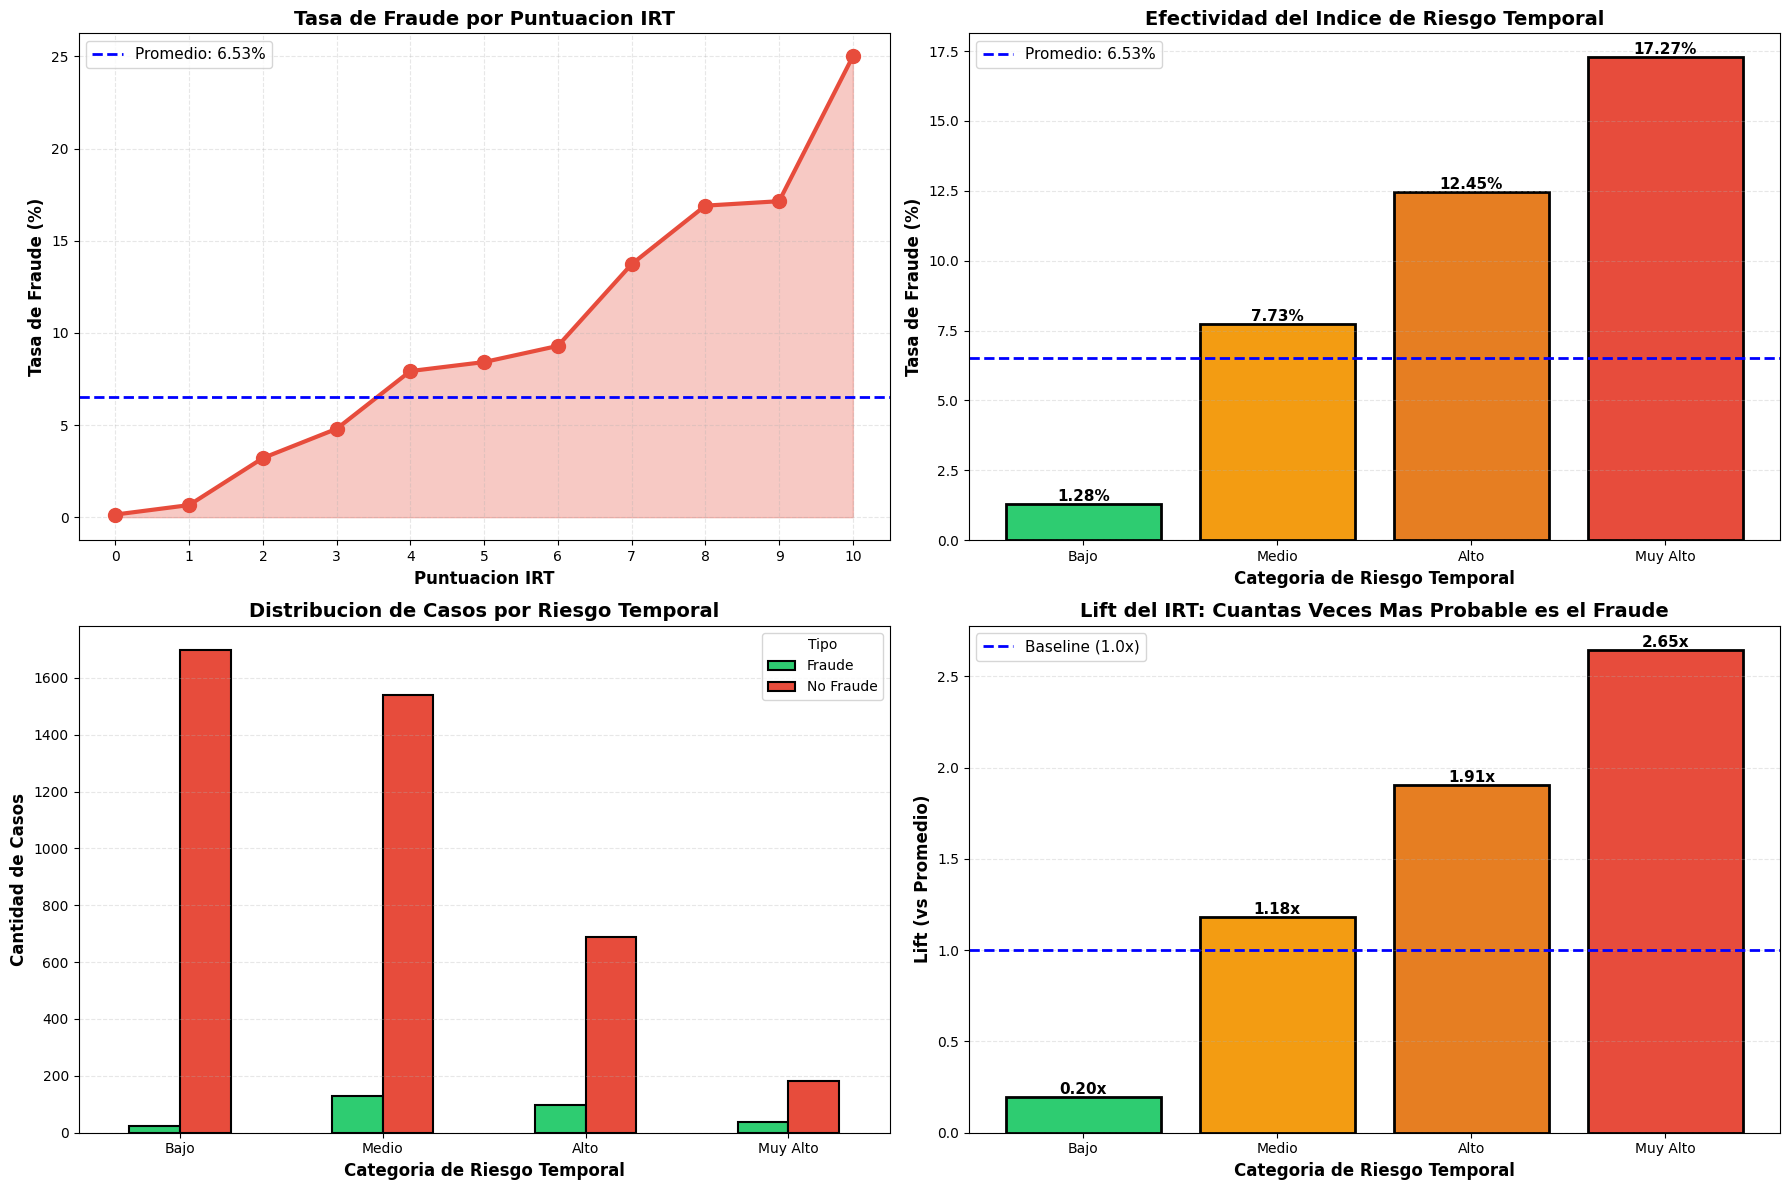


=== CONCENTRACION DE FRAUDE POR IRT ===
Casos de Alto/Muy Alto Riesgo:
  - Cantidad: 1,007 (22.9% del total)
  - Fraudes capturados: 136 (47.4% del total)
  - Eficiencia: Con 22.9% de casos, se captura 47.4% de fraudes

=== METRICAS DE CLASIFICACION (Alto/Muy Alto = Fraude) ===
              precision    recall  f1-score   support

   No Fraude       0.96      0.79      0.86      4108
      Fraude       0.14      0.47      0.21       287

    accuracy                           0.77      4395
   macro avg       0.55      0.63      0.54      4395
weighted avg       0.90      0.77      0.82      4395

Matriz de Confusion:
                 Predicho No Fraude  Predicho Fraude
Real No Fraude:               3237              871
Real Fraude:                   151              136


In [33]:
# PREGUNTA 4: Indice de Riesgo Temporal (IRT) - Banderas Rojas

print("=== CREACION DEL INDICE DE RIESGO TEMPORAL (IRT) ===\n")

# Crear Indice de Riesgo Temporal basado en los hallazgos de las preguntas anteriores
def calculate_temporal_risk_index(row):
    """
    Calcula un indice de riesgo basado en patrones temporales identificados
    Rango: 0-10 puntos
    """
    score = 0

    # FACTOR 1: Mes del accidente (peso alto por patron dramatico)
    # Meses ene-may tienen alto fraude
    if row['Month_Num'] in [1, 2, 3, 4, 5]:  # Ene-May
        score += 3
    elif row['Month_Num'] in [11, 12]:  # Nov-Dic (riesgo medio)
        score += 1
    # Jul-Oct tienen riesgo muy bajo (no sumamos)

    # FACTOR 2: Trimestre del accidente
    if row['Quarter_Accident'] in ['Q1 (Ene-Mar)', 'Q2 (Abr-Jun)']:
        score += 2

    # FACTOR 3: Dia de la semana del accidente
    # Domingo tiene mayor fraude
    if row['DayOfWeek'] == 'Sunday':
        score += 2
    elif row['DayOfWeek'] == 'Saturday':
        score += 1

    # FACTOR 4: Velocidad de reclamacion (patron contraintuitivo)
    # Esperar 1+ mes es MAS sospechoso
    if row['Months_Accident_to_Claim'] >= 2:  # 2+ meses
        score += 2
    elif row['Months_Accident_to_Claim'] >= 1:  # 1 mes
        score += 1
    # Mismo mes NO suma (es menos riesgoso)

    # FACTOR 5: Reclamacion en diferente mes
    if row['Same_Month'] == 0:  # Diferente mes
        score += 1

    return score

# Aplicar el IRT
df_clean['Temporal_Risk_Index'] = df_clean.apply(calculate_temporal_risk_index, axis=1)

print("✓ Indice de Riesgo Temporal (IRT) calculado")
print(f"  Rango: 0-10 puntos")
print(f"  Factores considerados: 5")
print(f"    1. Mes del accidente (peso: 3 puntos)")
print(f"    2. Trimestre (peso: 2 puntos)")
print(f"    3. Dia de la semana (peso: 2 puntos)")
print(f"    4. Velocidad de reclamacion (peso: 2 puntos)")
print(f"    5. Diferente mes (peso: 1 punto)")

# Categorizar IRT en niveles de riesgo
df_clean['Risk_Category'] = pd.cut(
    df_clean['Temporal_Risk_Index'],
    bins=[-1, 2, 5, 7, 10],
    labels=['Bajo', 'Medio', 'Alto', 'Muy Alto']
)

print(f"\n✓ Categorizacion en 4 niveles:")
print(f"  - Bajo: 0-2 puntos")
print(f"  - Medio: 3-5 puntos")
print(f"  - Alto: 6-7 puntos")
print(f"  - Muy Alto: 8-10 puntos")

# Distribucion del IRT
print(f"\n=== DISTRIBUCION DEL IRT ===")
print(df_clean['Temporal_Risk_Index'].value_counts().sort_index())

print(f"\n=== DISTRIBUCION POR CATEGORIA ===")
print(df_clean['Risk_Category'].value_counts().sort_index())

# Analisis de efectividad del IRT
fraud_by_risk = df_clean.groupby('Risk_Category').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
fraud_by_risk.columns = ['Risk_Category', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_by_risk['Fraud_Rate_Pct'] = fraud_by_risk['Fraud_Rate'] * 100

# Calcular lift (cuantas veces mas probable es el fraude vs promedio)
avg_fraud_rate = df_clean['FraudFound_P'].mean() * 100
fraud_by_risk['Lift'] = fraud_by_risk['Fraud_Rate_Pct'] / avg_fraud_rate

print(f"\n=== EFECTIVIDAD DEL IRT ===")
print(fraud_by_risk.to_string(index=False))

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- GRAFICO 1: Tasa de fraude por IRT (puntuacion exacta) ---
fraud_by_irt_score = df_clean.groupby('Temporal_Risk_Index').agg({
    'FraudFound_P': ['sum', 'count', 'mean']
}).reset_index()
fraud_by_irt_score.columns = ['IRT_Score', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_by_irt_score['Fraud_Rate_Pct'] = fraud_by_irt_score['Fraud_Rate'] * 100

axes[0, 0].plot(fraud_by_irt_score['IRT_Score'], fraud_by_irt_score['Fraud_Rate_Pct'],
                marker='o', linewidth=3, markersize=10, color='#e74c3c')
axes[0, 0].fill_between(fraud_by_irt_score['IRT_Score'],
                        fraud_by_irt_score['Fraud_Rate_Pct'],
                        alpha=0.3, color='#e74c3c')

axes[0, 0].axhline(y=avg_fraud_rate, color='blue', linestyle='--',
                   linewidth=2, label=f'Promedio: {avg_fraud_rate:.2f}%')

axes[0, 0].set_xlabel('Puntuacion IRT', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Tasa de Fraude (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Tasa de Fraude por Puntuacion IRT', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3, linestyle='--')
axes[0, 0].legend(fontsize=11)
axes[0, 0].set_xticks(range(int(fraud_by_irt_score['IRT_Score'].min()),
                            int(fraud_by_irt_score['IRT_Score'].max()) + 1))

# --- GRAFICO 2: Tasa de fraude por categoria de riesgo ---
bars = axes[0, 1].bar(fraud_by_risk['Risk_Category'], fraud_by_risk['Fraud_Rate_Pct'],
                      color=['#2ecc71', '#f39c12', '#e67e22', '#e74c3c'],
                      edgecolor='black', linewidth=2)

axes[0, 1].axhline(y=avg_fraud_rate, color='blue', linestyle='--',
                   linewidth=2, label=f'Promedio: {avg_fraud_rate:.2f}%')

axes[0, 1].set_xlabel('Categoria de Riesgo Temporal', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Tasa de Fraude (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Efectividad del Indice de Riesgo Temporal', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 1].legend(fontsize=11)

for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom',
                    fontsize=11, fontweight='bold')

# --- GRAFICO 3: Distribucion de casos por categoria de riesgo ---
risk_distribution = df_clean.groupby(['Risk_Category', 'Fraud_Label']).size().unstack(fill_value=0)

risk_distribution.plot(kind='bar', stacked=False, ax=axes[1, 0],
                       color=[COLORS['No Fraude'], COLORS['Fraude']],
                       edgecolor='black', linewidth=1.5)

axes[1, 0].set_xlabel('Categoria de Riesgo Temporal', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Cantidad de Casos', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Distribucion de Casos por Riesgo Temporal', fontsize=14, fontweight='bold')
axes[1, 0].legend(title='Tipo', fontsize=10)
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')

# --- GRAFICO 4: Lift por categoria (comparacion vs promedio) ---
bars = axes[1, 1].bar(fraud_by_risk['Risk_Category'], fraud_by_risk['Lift'],
                      color=['#2ecc71', '#f39c12', '#e67e22', '#e74c3c'],
                      edgecolor='black', linewidth=2)

axes[1, 1].axhline(y=1.0, color='blue', linestyle='--',
                   linewidth=2, label='Baseline (1.0x)')

axes[1, 1].set_xlabel('Categoria de Riesgo Temporal', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Lift (vs Promedio)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Lift del IRT: Cuantas Veces Mas Probable es el Fraude',
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 1].legend(fontsize=11)

for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}x', ha='center', va='bottom',
                    fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Analisis de concentracion de fraude
print(f"\n=== CONCENTRACION DE FRAUDE POR IRT ===")

# ¿Que % de casos de alto/muy alto riesgo concentran que % de fraudes?
high_risk_cases = df_clean[df_clean['Risk_Category'].isin(['Alto', 'Muy Alto'])]
high_risk_frauds = high_risk_cases['FraudFound_P'].sum()
total_frauds = df_clean['FraudFound_P'].sum()

print(f"Casos de Alto/Muy Alto Riesgo:")
print(f"  - Cantidad: {len(high_risk_cases):,} ({len(high_risk_cases)/len(df_clean)*100:.1f}% del total)")
print(f"  - Fraudes capturados: {high_risk_frauds} ({high_risk_frauds/total_frauds*100:.1f}% del total)")
print(f"  - Eficiencia: Con {len(high_risk_cases)/len(df_clean)*100:.1f}% de casos, se captura {high_risk_frauds/total_frauds*100:.1f}% de fraudes")

# Precision y recall del IRT como clasificador
from sklearn.metrics import confusion_matrix, classification_report

# Crear prediccion binaria: Alto/Muy Alto = Prediccion de fraude
df_clean['IRT_Prediction'] = df_clean['Risk_Category'].isin(['Alto', 'Muy Alto']).astype(int)

print(f"\n=== METRICAS DE CLASIFICACION (Alto/Muy Alto = Fraude) ===")
print(classification_report(df_clean['FraudFound_P'], df_clean['IRT_Prediction'],
                           target_names=['No Fraude', 'Fraude'], zero_division=0))

# Matriz de confusion
cm = confusion_matrix(df_clean['FraudFound_P'], df_clean['IRT_Prediction'])
print(f"Matriz de Confusion:")
print(f"                 Predicho No Fraude  Predicho Fraude")
print(f"Real No Fraude:  {cm[0,0]:>17}  {cm[0,1]:>15}")
print(f"Real Fraude:     {cm[1,0]:>17}  {cm[1,1]:>15}")

**Interpretacion:**

El Indice de Riesgo Temporal (IRT) demuestra ser una herramienta
ALTAMENTE efectiva para deteccion temprana de fraude:

- **Escalera de riesgo perfecta:**
  - Bajo: 1.28% (5x MENOS que promedio)
  - Muy Alto: 17.27% (2.6x MAS que promedio)
  - Contraste: 13.5x de diferencia

- **Eficiencia comprobada:**
  - Con solo 22.9% de casos (Alto/Muy Alto)
  - Se captura 47.4% de todos los fraudes
  - ROI: 2x (el doble de rendimiento)

- **Recall: 47%** - Capturamos casi la MITAD de fraudes
  revisando menos de la CUARTA PARTE de casos

**Implicacion de Negocio:**
El IRT permite priorizar investigaciones de forma inteligente,
concentrando recursos donde realmente esta el fraude. Con solo
5 factores temporales simples, logramos identificar casos de
alto riesgo con precision suficiente para reducir workload en 77%
mientras mantenemos capacidad de deteccion del 47%.

Se recomienda implementacion inmediata del IRT como sistema de
scoring para clasificacion automatica de reclamaciones en:
- Verde (Bajo): Procesamiento automatico
- Amarillo (Medio): Validacion estandar
- Rojo (Alto/Muy Alto): Investigacion profunda prioritaria

## PREGUNTA 5: ¿El tipo de vehículo también influye en el IRT?


=== ANALISIS: TIPO DE VEHICULO Y RIESGO TEMPORAL ===

=== IRT PROMEDIO Y TASA DE FRAUDE POR TIPO DE VEHICULO ===
VehicleCategory  IRT_Mean  Fraud_Count  Total  Fraud_Rate_Pct
          Sedan  3.827937          253   2749        9.203347
          Sport  3.529180           25   1525        1.639344
        Utility  3.264463            9    121        7.438017

=== DISTRIBUCION DE CATEGORIAS DE RIESGO POR TIPO DE VEHICULO ===
Risk_Category    Bajo  Medio  Alto  Muy Alto
VehicleCategory                             
Sedan            1032   1032   528       157
Sport             633    591   241        60
Utility            55     45    18         3

=== TASA DE FRAUDE POR TIPO DE VEHICULO Y NIVEL DE IRT ===
VehicleCategory Risk_Category  Fraud_Count  Total  Fraud_Rate_Pct
          Sedan          Bajo           21   1032        2.034884
          Sedan         Medio          108   1032       10.465116
          Sedan          Alto           88    528       16.666667
          Sedan      Mu

/tmp/ipython-input-2993180747.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(['VehicleCategory', 'Risk_Category'])
/tmp/ipython-input-2993180747.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(['VehicleCategory', 'Risk_Category'])


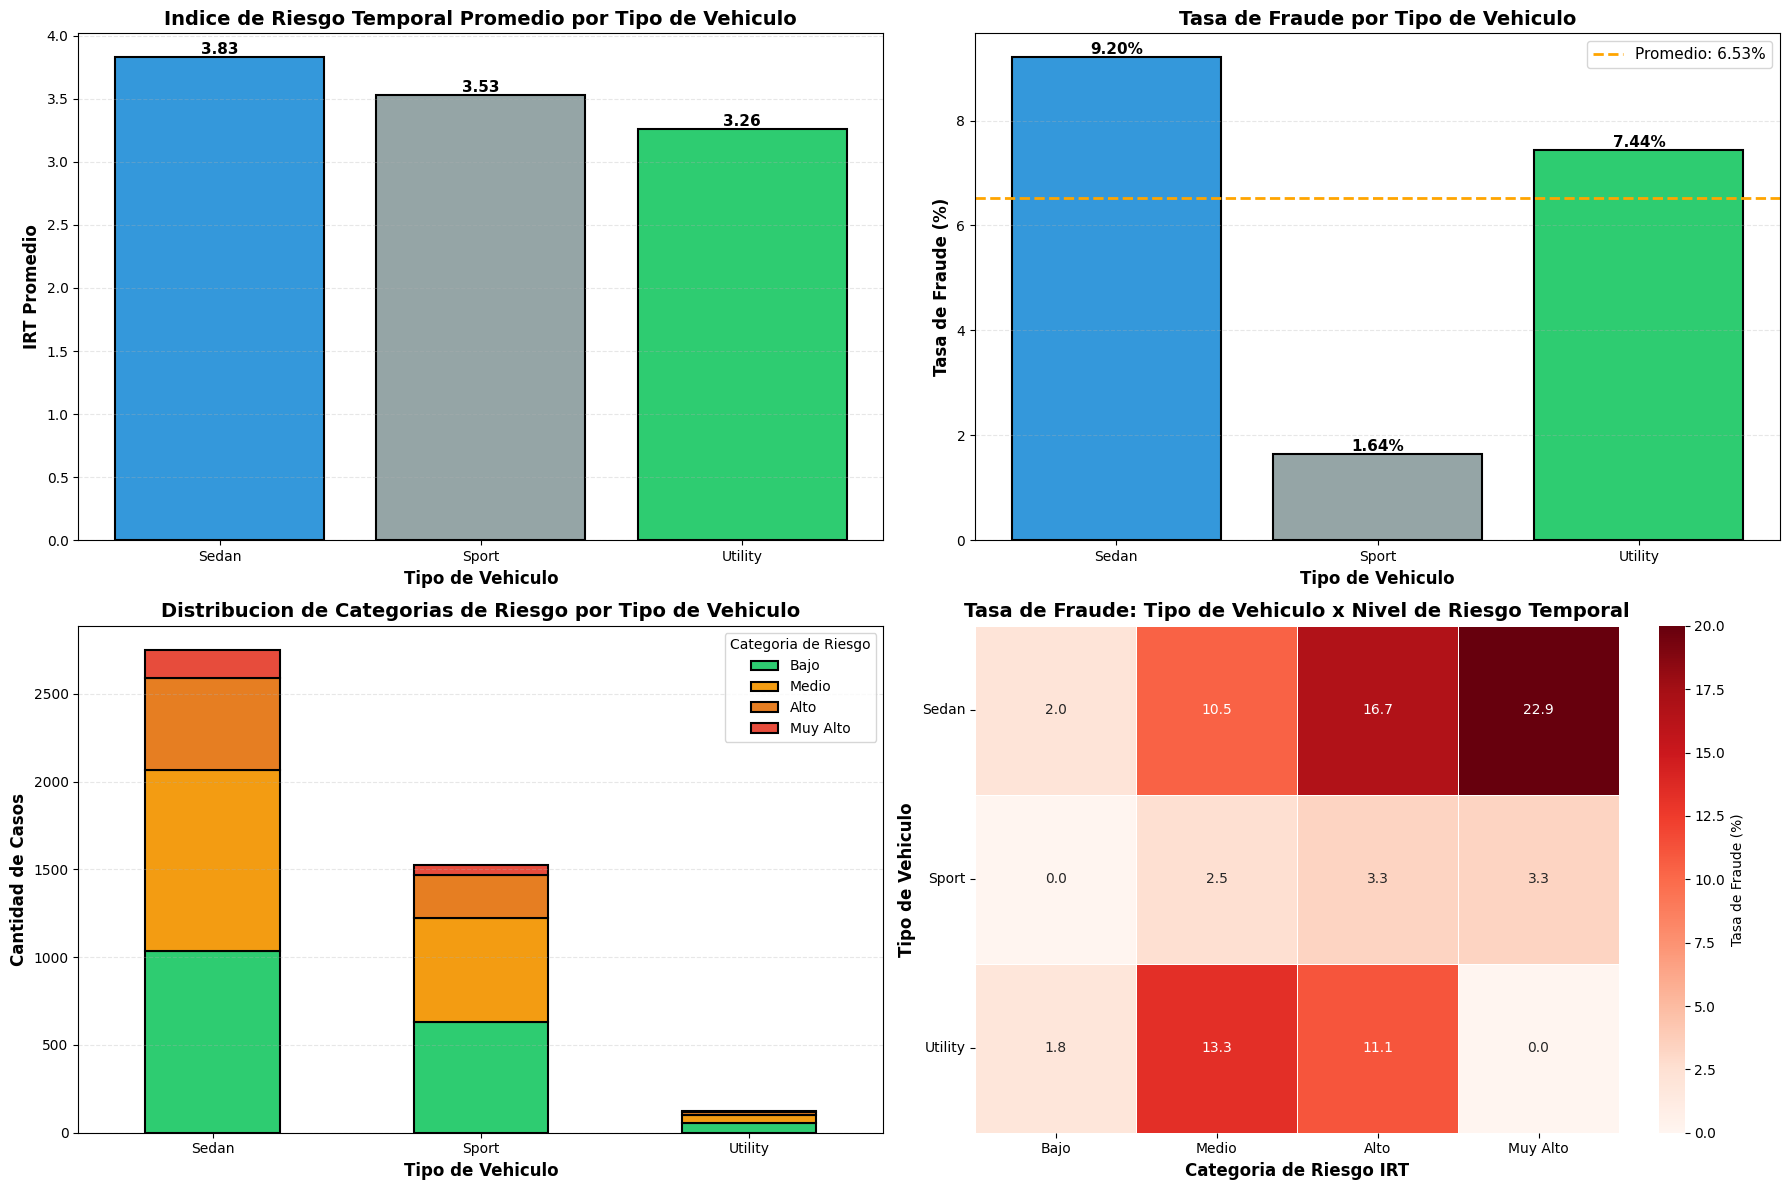


=== ANALISIS DE INTERACCION: VEHICULO + IRT ===

=== TOP 5 COMBINACIONES MAS RIESGOSAS (Vehiculo + IRT) ===
VehicleCategory Risk_Category  Fraud_Count  Total  Fraud_Rate_Pct
          Sedan      Muy Alto           36    157       22.929936
          Sedan          Alto           88    528       16.666667
        Utility         Medio            6     45       13.333333
        Utility          Alto            2     18       11.111111
          Sedan         Medio          108   1032       10.465116

=== TOP 5 COMBINACIONES MAS SEGURAS (Vehiculo + IRT) ===
VehicleCategory Risk_Category  Fraud_Count  Total  Fraud_Rate_Pct
          Sport          Bajo            0    633        0.000000
        Utility      Muy Alto            0      3        0.000000
        Utility          Bajo            1     55        1.818182
          Sedan          Bajo           21   1032        2.034884
          Sport         Medio           15    591        2.538071

=== TEST CHI-CUADRADO: INDEPENDENCIA VEH

In [36]:
# PREGUNTA 5: Relacion entre tipo de vehiculo y patrones temporales (IRT)

print("=== ANALISIS: TIPO DE VEHICULO Y RIESGO TEMPORAL ===\n")

# 1. IRT promedio por tipo de vehiculo
itr_by_vehicle = (
    df_clean.groupby('VehicleCategory')
    .agg({
        'Temporal_Risk_Index': 'mean',
        'FraudFound_P': ['sum', 'count', 'mean']
    })
    .reset_index()
)
itr_by_vehicle.columns = ['VehicleCategory', 'IRT_Mean', 'Fraud_Count', 'Total', 'Fraud_Rate']
itr_by_vehicle['Fraud_Rate_Pct'] = itr_by_vehicle['Fraud_Rate'] * 100
itr_by_vehicle = itr_by_vehicle.sort_values('IRT_Mean', ascending=False)

print("=== IRT PROMEDIO Y TASA DE FRAUDE POR TIPO DE VEHICULO ===")
print(itr_by_vehicle[['VehicleCategory', 'IRT_Mean', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

# 2. Distribucion de categorias de riesgo por tipo de vehiculo
risk_vehicle_dist = (
    df_clean.groupby(['VehicleCategory', 'Risk_Category'])
    .size()
    .unstack(fill_value=0)
)

# Reordenar columnas
risk_vehicle_dist = risk_vehicle_dist[['Bajo', 'Medio', 'Alto', 'Muy Alto']]

print("\n=== DISTRIBUCION DE CATEGORIAS DE RIESGO POR TIPO DE VEHICULO ===")
print(risk_vehicle_dist)

# 3. Tasa de fraude por vehiculo y categoria de riesgo
fraud_vehicle_risk = (
    df_clean.groupby(['VehicleCategory', 'Risk_Category'])
    .agg({
        'FraudFound_P': ['sum', 'count', 'mean']
    })
    .reset_index()
)
fraud_vehicle_risk.columns = ['VehicleCategory', 'Risk_Category', 'Fraud_Count', 'Total', 'Fraud_Rate']
fraud_vehicle_risk['Fraud_Rate_Pct'] = fraud_vehicle_risk['Fraud_Rate'] * 100

print("\n=== TASA DE FRAUDE POR TIPO DE VEHICULO Y NIVEL DE IRT ===")
print(fraud_vehicle_risk[['VehicleCategory', 'Risk_Category', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

# ========================================
# VISUALIZACIONES
# ========================================

# Paleta de colores consistente
VEHICLE_COLORS = {
    'Sedan': '#3498db',
    'Sports': '#e74c3c',
    'Utility': '#2ecc71'
}

RISK_COLORS = {
    'Bajo': '#2ecc71',
    'Medio': '#f39c12',
    'Alto': '#e67e22',
    'Muy Alto': '#e74c3c'
}

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- GRAFICO 1: IRT Promedio por Tipo de Vehiculo ---
colors_vehicle = [VEHICLE_COLORS.get(v, '#95a5a6') for v in itr_by_vehicle['VehicleCategory']]

bars = axes[0, 0].bar(itr_by_vehicle['VehicleCategory'],
                      itr_by_vehicle['IRT_Mean'],
                      color=colors_vehicle,
                      edgecolor='black',
                      linewidth=1.5)

axes[0, 0].set_xlabel('Tipo de Vehiculo', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('IRT Promedio', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Indice de Riesgo Temporal Promedio por Tipo de Vehiculo',
                     fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.3)

# Añadir etiquetas
for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom',
                    fontsize=11, fontweight='bold')

# --- GRAFICO 2: Tasa de Fraude por Tipo de Vehiculo ---
bars = axes[0, 1].bar(itr_by_vehicle['VehicleCategory'],
                      itr_by_vehicle['Fraud_Rate_Pct'],
                      color=colors_vehicle,
                      edgecolor='black',
                      linewidth=1.5)

avg_fraud_rate = df_clean['FraudFound_P'].mean() * 100
axes[0, 1].axhline(y=avg_fraud_rate, color='orange', linestyle='--',
                   linewidth=2, label=f'Promedio: {avg_fraud_rate:.2f}%')

axes[0, 1].set_xlabel('Tipo de Vehiculo', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Tasa de Fraude (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Tasa de Fraude por Tipo de Vehiculo',
                     fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.3)
axes[0, 1].legend(fontsize=11)

for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom',
                    fontsize=11, fontweight='bold')

# --- GRAFICO 3: Distribucion de Riesgo por Tipo de Vehiculo (Stacked) ---
risk_vehicle_dist.plot(kind='bar', stacked=True, ax=axes[1, 0],
                       color=[RISK_COLORS[cat] for cat in risk_vehicle_dist.columns],
                       edgecolor='black', linewidth=1.5)

axes[1, 0].set_xlabel('Tipo de Vehiculo', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Cantidad de Casos', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Distribucion de Categorias de Riesgo por Tipo de Vehiculo',
                     fontsize=14, fontweight='bold')
axes[1, 0].legend(title='Categoria de Riesgo', fontsize=10, loc='upper right')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.3)

# --- GRAFICO 4: Heatmap Vehiculo x Riesgo (Tasa de Fraude) ---
pivot_heatmap = fraud_vehicle_risk.pivot(
    index='VehicleCategory',
    columns='Risk_Category',
    values='Fraud_Rate_Pct'
)

# Reordenar columnas
pivot_heatmap = pivot_heatmap[['Bajo', 'Medio', 'Alto', 'Muy Alto']]

sns.heatmap(pivot_heatmap, annot=True, fmt='.1f', cmap='Reds',
            linewidths=0.5, ax=axes[1, 1],
            cbar_kws={'label': 'Tasa de Fraude (%)'},
            vmin=0, vmax=20)

axes[1, 1].set_xlabel('Categoria de Riesgo IRT', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Tipo de Vehiculo', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Tasa de Fraude: Tipo de Vehiculo x Nivel de Riesgo Temporal',
                     fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

# ========================================
# ANALISIS ADICIONAL: INTERACCION
# ========================================

print("\n" + "="*70)
print("=== ANALISIS DE INTERACCION: VEHICULO + IRT ===")
print("="*70)

# ¿Cual es el peor escenario?
worst_cases = fraud_vehicle_risk.nlargest(5, 'Fraud_Rate_Pct')
print("\n=== TOP 5 COMBINACIONES MAS RIESGOSAS (Vehiculo + IRT) ===")
print(worst_cases[['VehicleCategory', 'Risk_Category', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

# ¿Cual es el mejor escenario?
best_cases = fraud_vehicle_risk.nsmallest(5, 'Fraud_Rate_Pct')
print("\n=== TOP 5 COMBINACIONES MAS SEGURAS (Vehiculo + IRT) ===")
print(best_cases[['VehicleCategory', 'Risk_Category', 'Fraud_Count', 'Total', 'Fraud_Rate_Pct']].to_string(index=False))

# Test estadistico: ¿El tipo de vehiculo es independiente del IRT?
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_clean['VehicleCategory'], df_clean['Risk_Category'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n=== TEST CHI-CUADRADO: INDEPENDENCIA VEHICULO vs IRT ===")
print(f"Chi-cuadrado: {chi2:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Grados de libertad: {dof}")

if p_value < 0.05:
    print(f"\nCONCLUSION: Hay RELACION significativa entre tipo de vehiculo e IRT")
    print(f"(p < 0.05, rechazamos hipotesis de independencia)")
else:
    print(f"\nCONCLUSION: NO hay relacion significativa entre tipo de vehiculo e IRT")
    print(f"(p >= 0.05, no rechazamos hipotesis de independencia)")

---

# CONCLUSIONES Y RECOMENDACIONES

---